<a href="https://colab.research.google.com/github/fatalistix/smgmo/blob/main/lab4-part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn, optim
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import Subset

from tqdm import tqdm

import scipy

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
# idxs = torch.arange(600)
train_dataset = datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./datasets', train=False, transform=transforms.ToTensor(), download=True)

In [ ]:
class SimplePerceptron(nn.Module):
  def __init__(self, input_size, output_size):
    super(SimplePerceptron, self).__init__()

    self.layer = nn.Sequential(
      nn.Flatten(),
      nn.Linear(input_size, output_size),
    )

  def forward(self, x):
    return self.layer(x)

In [ ]:
# class SimplePerceptron:

#   def __init__(self):
#     self.weights = np.array([0 for _ in range(len(28*28))])
#     self.bias = 0

#   def fit(self, x, y, epochs: int):
#     n_examples = len(x)
#     for epoch in range(epochs):
#       epoch_x = x[epoch % n_examples]
#       pred = self.predict(epoch_x)
#       self._update_weights(epoch_x, pred, y[epoch])

#   def _update_weights(self, example_features, y_actual, y_predicted):
#     if y_actual == 1:
#       if y_predicted > 0:
#         self.weights = self.weights
#         self.bias = self.bias
#       else:
#         self.weights = self.weights + self.learning_rate * example_features
#         self.bias = self.bias + self.learning_rate
#     else:
#       if y_predicted > 0:
#         self.weights = self.weights - self.learning_rate * example_features
#         self.bias = self.bias - self.learning_rate
#       else:
#         self.weights = self.weights
#         self.bias = self.bias

#   def predict(self, features):
#     pred = np.dot(features, self.weights) + self.bias
#     return 1 if pred > 0 else -1

In [ ]:
def fit(model, dataloader, optimizer, criterion, epochs):
  for epoch in tqdm(range(epochs)):
    model.train()

    for img, label in dataloader:
      # print(img.shape)
      # print(label.shape)
      optimizer.zero_grad()

      pred = model(img)

      loss = criterion(pred, label)

      loss.backward()
      optimizer.step()

    model.eval()
    if (epoch + 1) % 1 == 0:
      accuracy = accuracy_score(label.numpy(), np.argmax(model(img).detach().numpy(), axis=1))
      print(f'Epoch[{epoch + 1}/{epochs}], Loss: {loss}, accuracy {accuracy}')

In [ ]:
batch_size = 100
lr = 0.001
epochs = 25
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, drop_last=True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size, shuffle=True, drop_last=True
)

In [ ]:
model = SimplePerceptron(28 * 28, 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

fit(model, train_loader, optimizer, criterion, epochs)

  4%|▍         | 1/25 [00:08<03:12,  8.02s/it]

Epoch[1/25], Loss: 1.821744441986084, accuracy 0.66


  8%|▊         | 2/25 [00:16<03:09,  8.25s/it]

Epoch[2/25], Loss: 1.5340335369110107, accuracy 0.74


 12%|█▏        | 3/25 [00:24<03:01,  8.24s/it]

Epoch[3/25], Loss: 1.2388337850570679, accuracy 0.81


 16%|█▌        | 4/25 [00:39<03:47, 10.81s/it]

Epoch[4/25], Loss: 1.1940011978149414, accuracy 0.78


 20%|██        | 5/25 [00:50<03:37, 10.89s/it]

Epoch[5/25], Loss: 1.120303988456726, accuracy 0.76


 24%|██▍       | 6/25 [01:06<04:02, 12.77s/it]

Epoch[6/25], Loss: 0.8784855008125305, accuracy 0.85


 28%|██▊       | 7/25 [01:21<04:03, 13.54s/it]

Epoch[7/25], Loss: 0.7859146595001221, accuracy 0.88


 32%|███▏      | 8/25 [01:35<03:47, 13.38s/it]

Epoch[8/25], Loss: 0.6854574680328369, accuracy 0.92


 36%|███▌      | 9/25 [01:46<03:23, 12.72s/it]

Epoch[9/25], Loss: 0.8028799295425415, accuracy 0.81


 40%|████      | 10/25 [01:58<03:08, 12.55s/it]

Epoch[10/25], Loss: 0.726308286190033, accuracy 0.87


 44%|████▍     | 11/25 [02:06<02:37, 11.27s/it]

Epoch[11/25], Loss: 0.6162300705909729, accuracy 0.9


 48%|████▊     | 12/25 [02:14<02:11, 10.08s/it]

Epoch[12/25], Loss: 0.758982241153717, accuracy 0.83


 52%|█████▏    | 13/25 [02:22<01:55,  9.63s/it]

Epoch[13/25], Loss: 0.7128534913063049, accuracy 0.83


 56%|█████▌    | 14/25 [02:30<01:38,  8.95s/it]

Epoch[14/25], Loss: 0.6536366939544678, accuracy 0.87


 60%|██████    | 15/25 [02:38<01:27,  8.79s/it]

Epoch[15/25], Loss: 0.5468617081642151, accuracy 0.9


 64%|██████▍   | 16/25 [02:49<01:24,  9.41s/it]

Epoch[16/25], Loss: 0.5202522277832031, accuracy 0.92


 68%|██████▊   | 17/25 [02:57<01:11,  8.95s/it]

Epoch[17/25], Loss: 0.6329705715179443, accuracy 0.88


 72%|███████▏  | 18/25 [03:11<01:14, 10.59s/it]

Epoch[18/25], Loss: 0.5334662795066833, accuracy 0.84


 76%|███████▌  | 19/25 [03:22<01:04, 10.73s/it]

Epoch[19/25], Loss: 0.643912672996521, accuracy 0.84


 80%|████████  | 20/25 [03:33<00:53, 10.69s/it]

Epoch[20/25], Loss: 0.42377349734306335, accuracy 0.91


 84%|████████▍ | 21/25 [03:43<00:41, 10.41s/it]

Epoch[21/25], Loss: 0.574616014957428, accuracy 0.86


 88%|████████▊ | 22/25 [03:50<00:28,  9.51s/it]

Epoch[22/25], Loss: 0.6451220512390137, accuracy 0.81


 92%|█████████▏| 23/25 [04:01<00:19,  9.88s/it]

Epoch[23/25], Loss: 0.546241283416748, accuracy 0.86


 96%|█████████▌| 24/25 [04:09<00:09,  9.46s/it]

Epoch[24/25], Loss: 0.5361971855163574, accuracy 0.86


100%|██████████| 25/25 [04:17<00:00, 10.29s/it]

Epoch[25/25], Loss: 0.5922108292579651, accuracy 0.81


In [ ]:
result_accuracy = 0
for img, label in test_loader:
  model.eval()
  result_accuracy += accuracy_score(label.numpy(), np.argmax(model(img).detach().numpy(), axis=1))

print(result_accuracy / len(test_loader))

0.8785000000000003


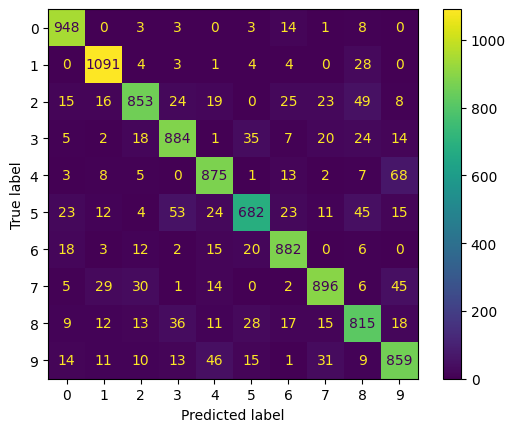

In [ ]:
y_true = []
y_pred = []

model.eval()

for (img, label) in test_dataset:
  y_true.append(label)
  pred = model(img)
  y_pred.append(np.argmax(pred.detach().numpy()))

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Часть 2

## Многослойный перцептрон-регрессор

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_size, hidden_sizes, output_size, activation):
    super(MLP, self).__init__()
    layers = []
    layers.append(nn.Linear(input_size, hidden_sizes[0] if len(hidden_sizes) != 0 else output_size))
    layers.append(activation())
    for i in range(len(hidden_sizes) - 1):
      layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
      layers.append(activation())

    layers.append(nn.Linear(hidden_sizes[-1] if len(hidden_sizes) != 0 else input_size, output_size))

    self.stack = nn.Sequential(*layers)

  def forward(self, x):
    return self.stack(x)

In [ ]:
def fit(model, epochs: int, dataloader, optimizer, loss_f, f, x_bounds, y_lims):
  accuracies = []
  for epoch in range(epochs): #tqdm(range(epochs)):
    model.train()

    for x, label in dataloader:
      optimizer.zero_grad()

      # print(x.shape)
      # print(label.shape)

      pred = model(x)
      # print(pred.shape)

      # return

      loss = loss_f(pred, label)

      loss.backward()
      optimizer.step()

    if (epoch + 1) % 100 == 0:
      draw(model, f, [x_bounds[0] - 0.5, x_bounds[1] + 0.5], y_lims, 0.001, epoch + 1)
      # accuracy = accuracy_score(label.numpy(), np.argmax(model(x).detach().numpy(), axis=1))
      # print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss}, accuracy {accuracy}')

In [ ]:
def flat_dataloader(dataloader):
  all_inputs = []
  all_labels = []

  for inputs, labels in dataloader:
    all_inputs.append(inputs)
    all_labels.append(labels)

  all_inputs = torch.cat(all_inputs, dim=0)
  all_labels = torch.cat(all_labels, dim=0)

  return all_inputs, all_labels

In [ ]:
def draw(model, f, x_pltlim, y_pltlim, step, epoch: int):
  model.eval()

  x = np.arange(x_pltlim[0], x_pltlim[1], step)
  y = f(x)
  y_pred = [model(torch.tensor([__x]).type(torch.FloatTensor)).detach().numpy() for __x in x]

  ax = plt.subplot()
  plt.plot(x, y, 'g')
  plt.plot(x, y_pred, 'r')
  plt.xlim(x_pltlim)
  plt.ylim(y_pltlim)
  plt.title(epoch)
  plt.show()

## Создание модели

In [ ]:
def main():
  model = MLP(1, [7, 7, 7, 7, 7], 1, nn.Sigmoid)
  print(model)

  optimizer = optim.SGD(model.parameters(), lr = 0.01)
  criterion = nn.MSELoss()

  N = 120
  EPS0 = 0.005

  rng = np.random.default_rng()
  a = rng.uniform(-3, 3)
  b = rng.uniform(-3, 3)
  c = rng.uniform(-3, 3)
  d = rng.uniform(-3, 3)
  print(a, b, c, d)

  def f_polynom(x_arg):
    return a * x_arg ** 3 + b * x_arg ** 2 + c * x_arg + d

  def f_sinus(x_arg):
    return x_arg * np.sin(2 * np.pi * x_arg)

  f = f_polynom

  X_LIMS = [-1, 1]
  Y_LIMS = [-10, 10]
  x = rng.uniform(low=X_LIMS[0], high=X_LIMS[1], size=N)
  x_eps = rng.uniform(low=-EPS0, high=EPS0, size=N)
  x += x_eps

  y = np.array([f(__x) for __x in x])
  y_eps = rng.uniform(low=-EPS0, high=EPS0, size=N)
  y += y_eps

  dataset = [(torch.tensor([x[i]]).type(torch.FloatTensor), torch.tensor([y[i]]).type(torch.FloatTensor)) for i in range(N)]

  batch_size = 1
  dataloader = torch.utils.data.DataLoader(
      dataset, batch_size=batch_size, shuffle=True, drop_last=True
  )

  fit(model, 20000, dataloader, optimizer, criterion, f, X_LIMS, Y_LIMS)

  # print('model=', model(torch.tensor([x[0]]).type(torch.FloatTensor)))
  # print('y=', y)

  ax = plt.subplot()
  y_pred = [model(torch.tensor([__x]).type(torch.FloatTensor)).detach().numpy() for __x in x]
  plt.plot(x, y_pred, 'g.')

  x_l = np.linspace(X_LIMS[0], X_LIMS[1], 1000)
  plt.plot(x_l, f(x_l))
  plt.plot(x, y, '.')
  plt.ylim(Y_LIMS)
  plt.xlim(X_LIMS)
  plt.show()

MLP(
  (stack): Sequential(
    (0): Linear(in_features=1, out_features=7, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=7, out_features=7, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=7, out_features=7, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=7, out_features=7, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=7, out_features=7, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=7, out_features=1, bias=True)
  )
)
0.1980131500279505 -2.0076377293076106 0.31290782629093705 -1.8276950315643856


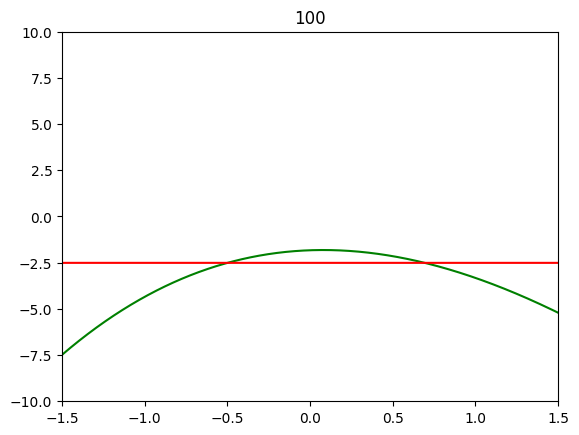

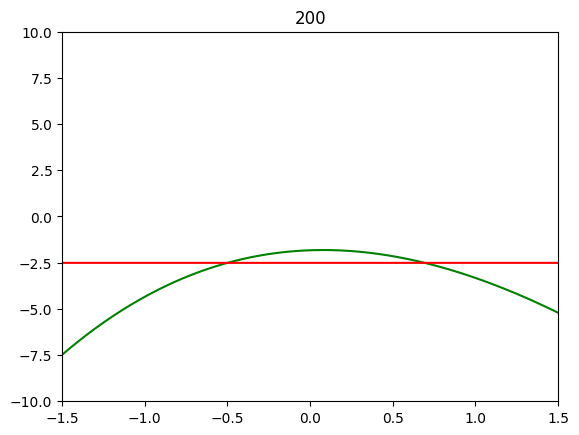

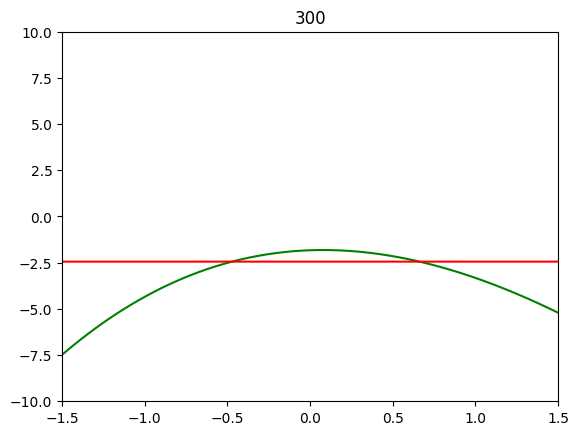

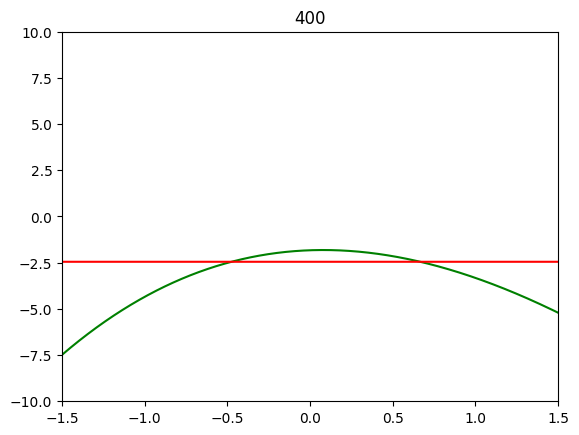

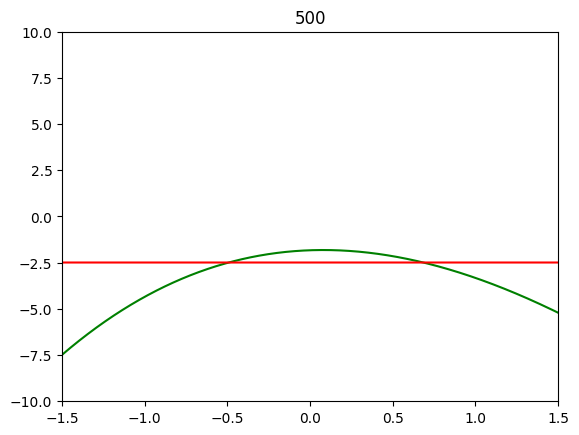

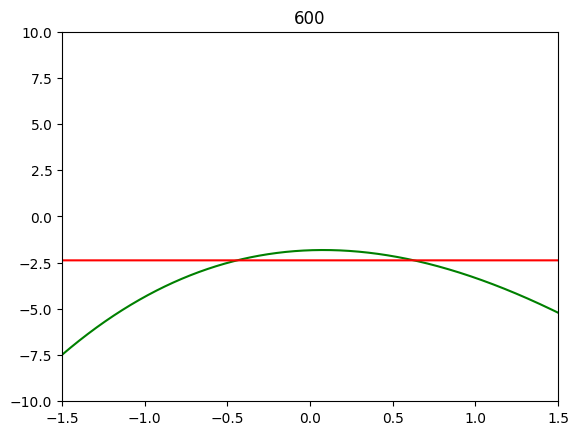

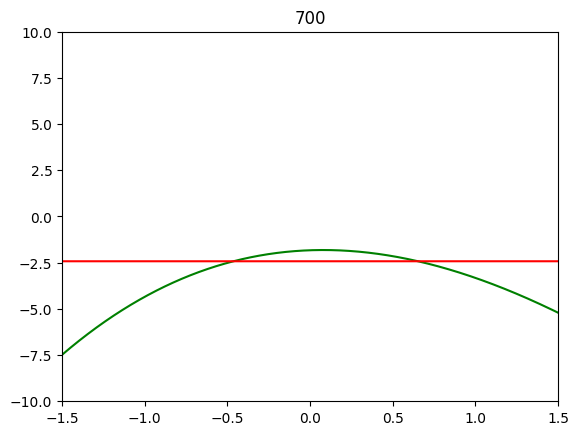

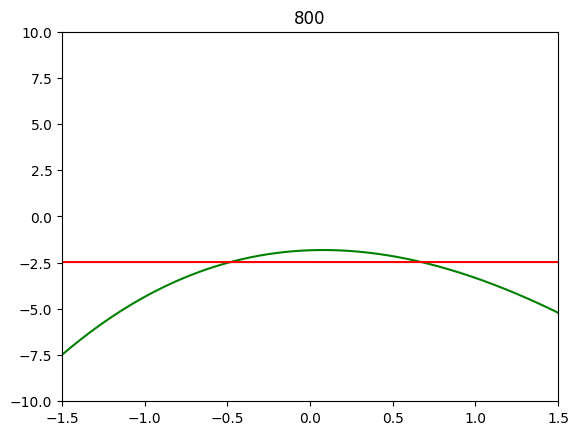

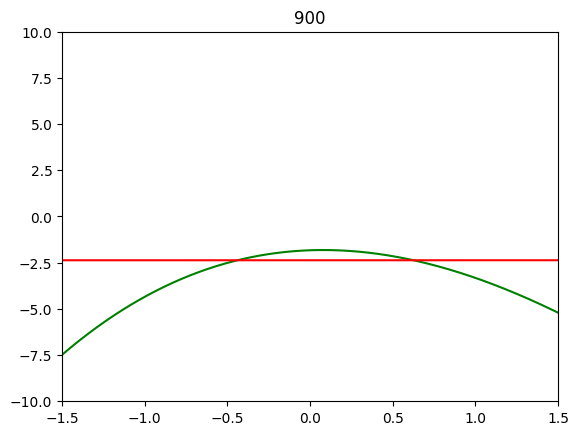

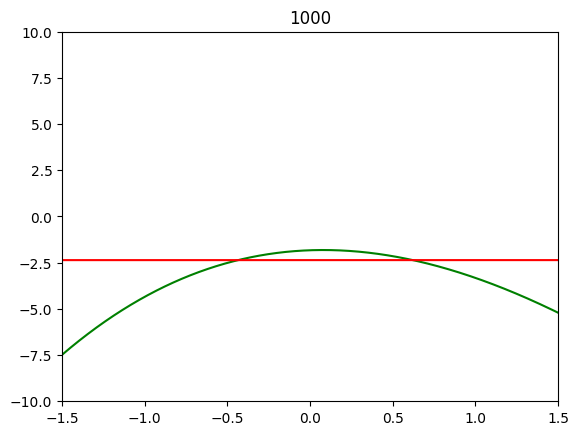

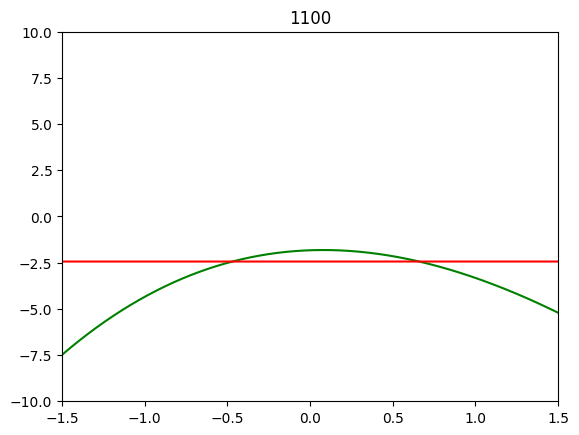

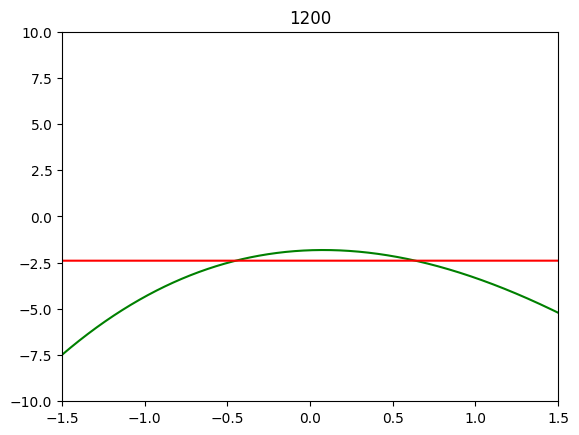

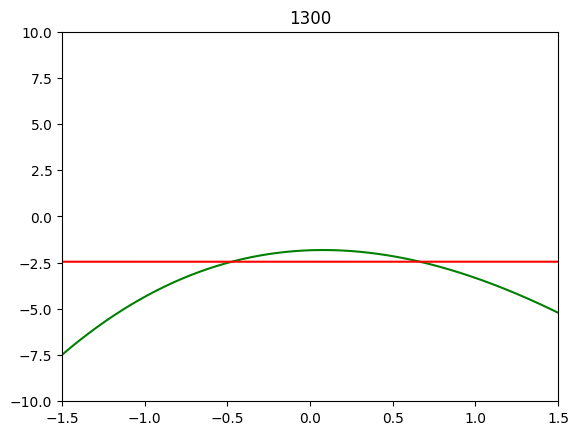

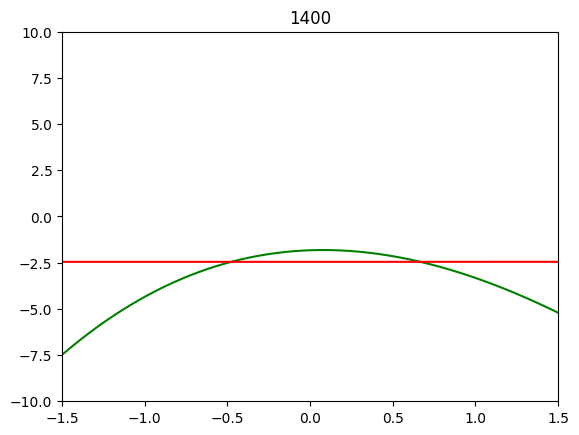

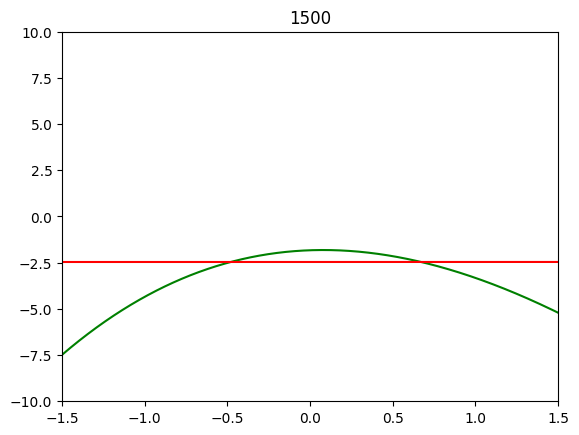

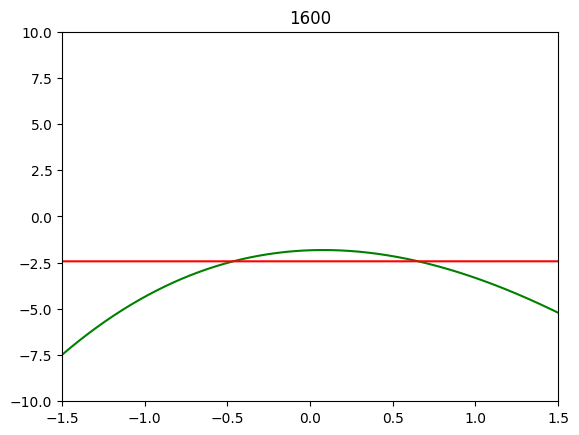

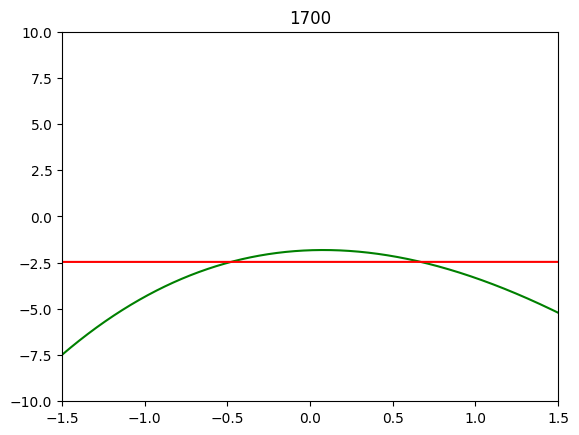

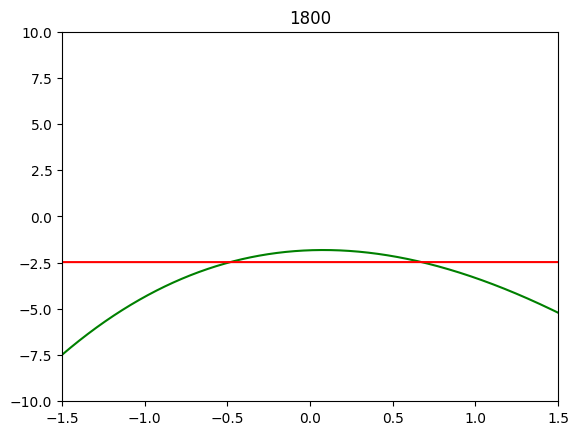

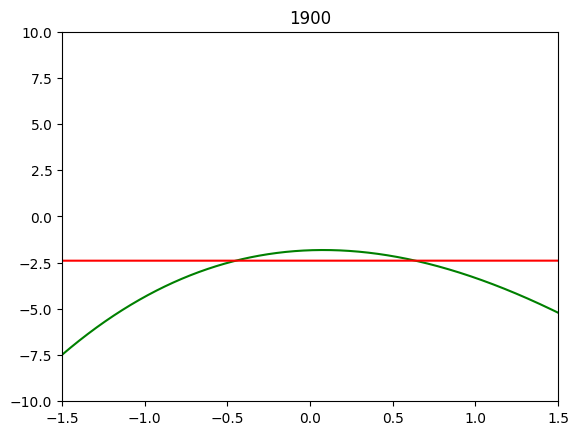

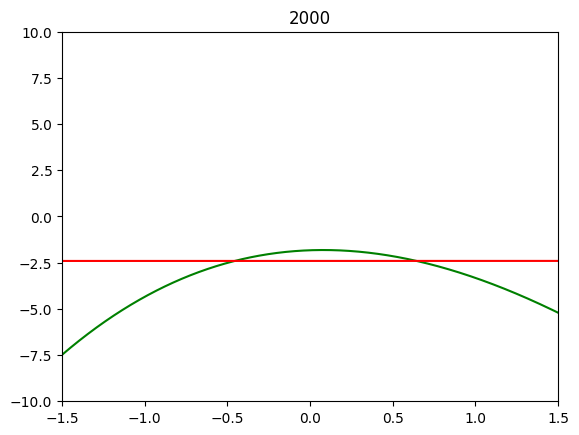

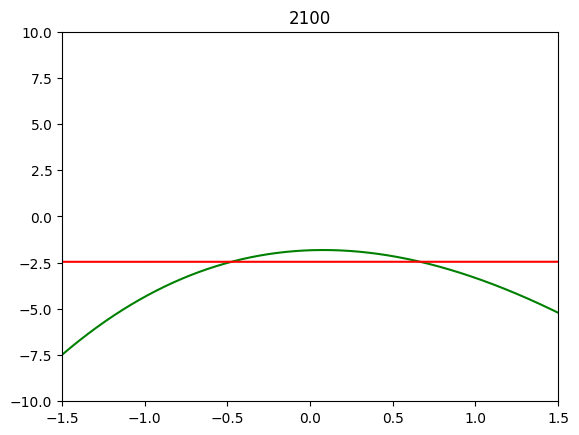

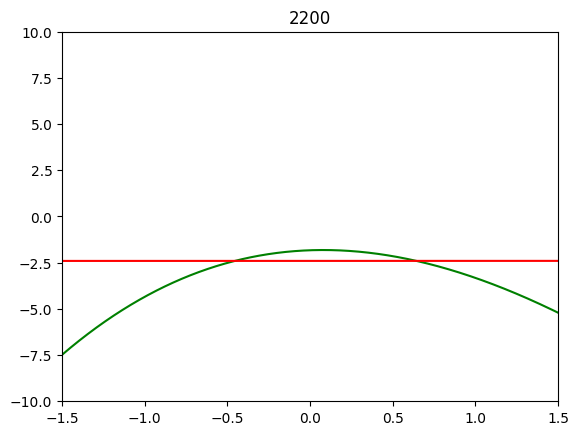

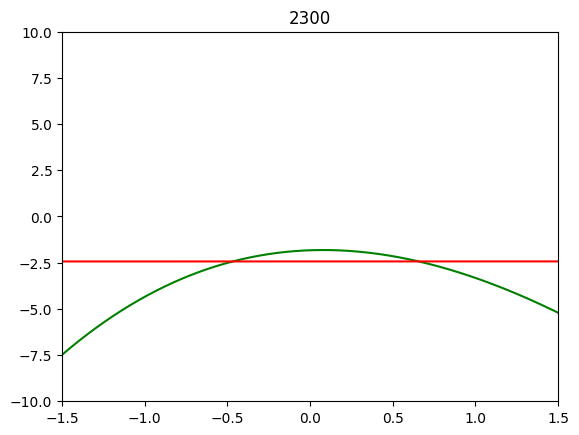

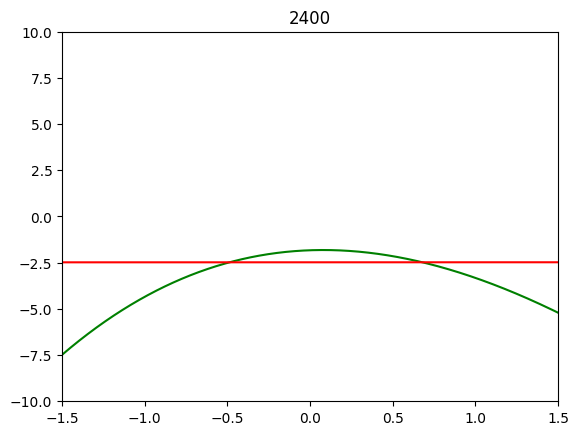

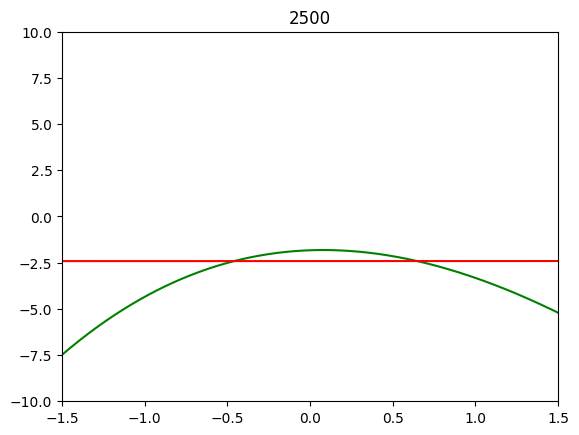

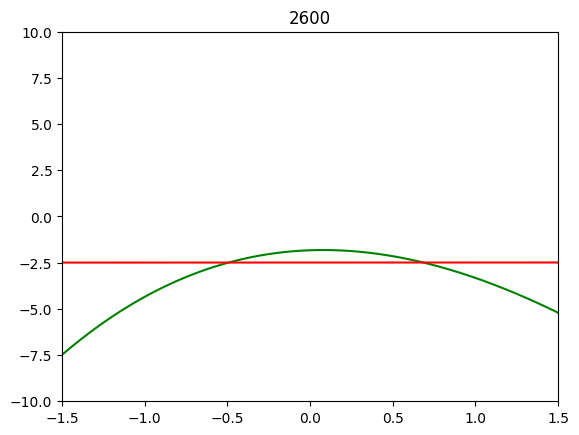

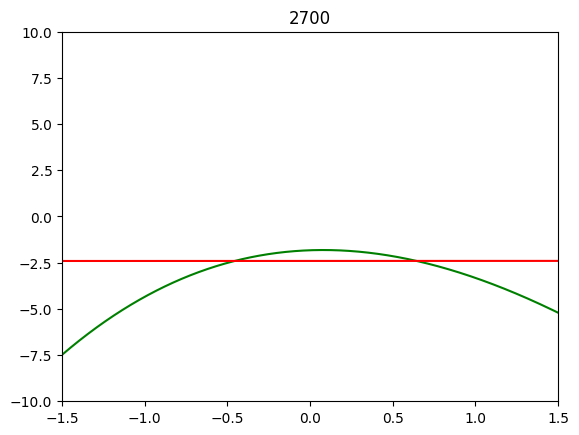

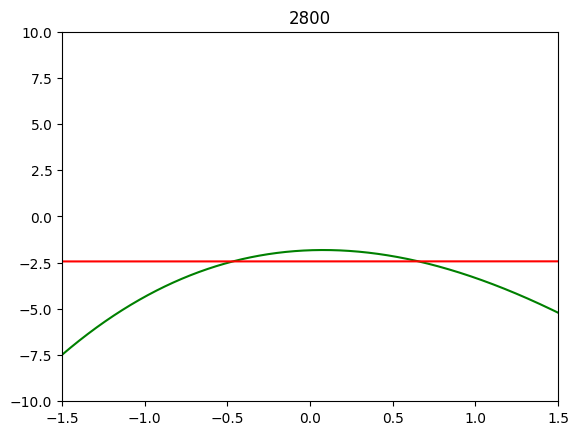

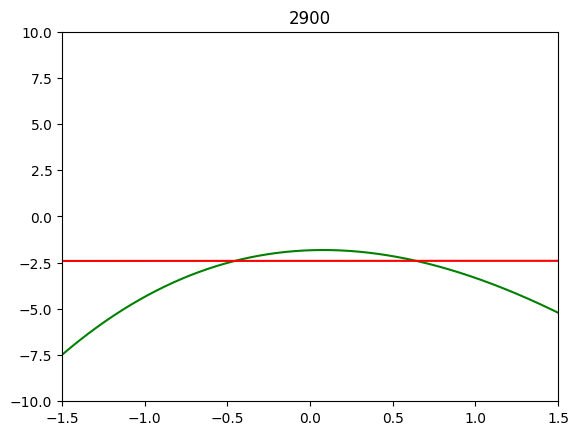

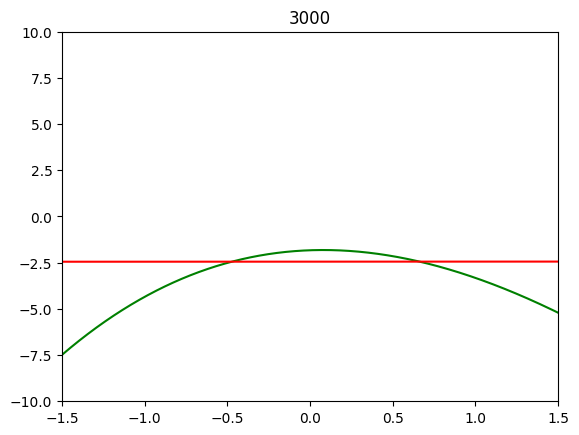

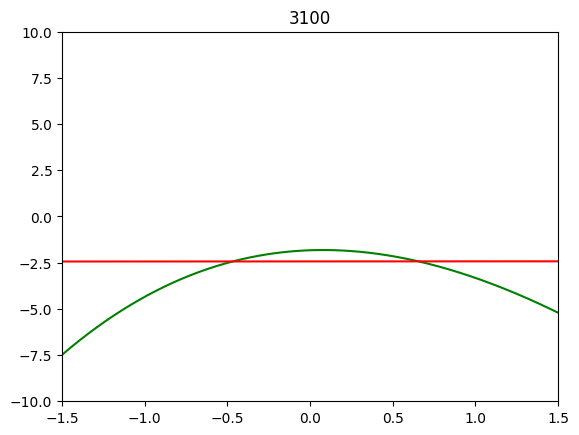

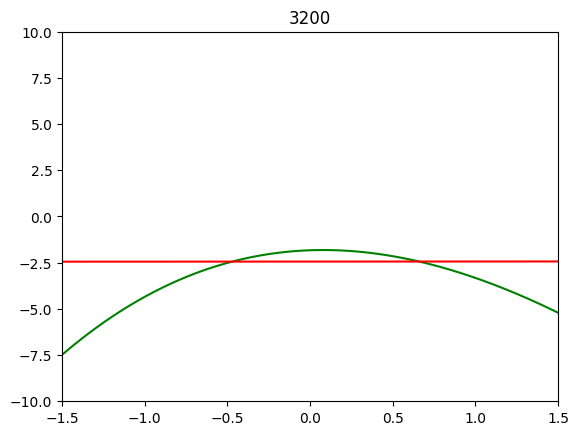

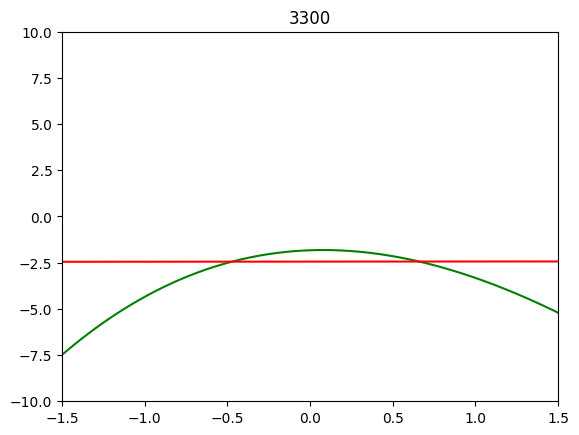

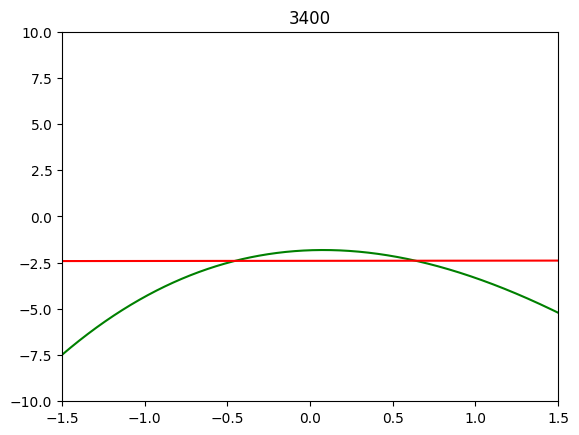

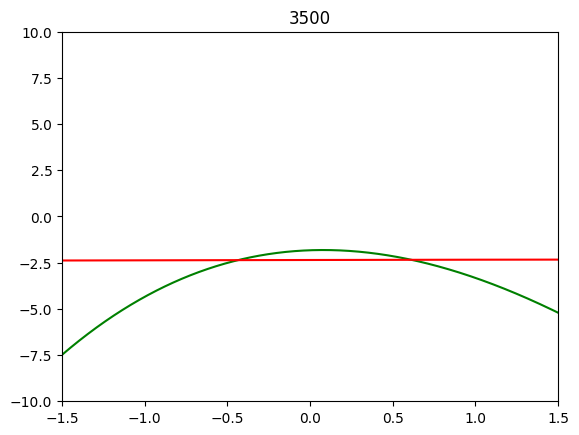

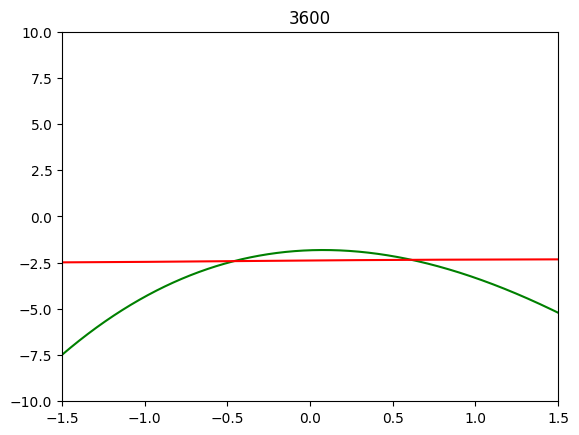

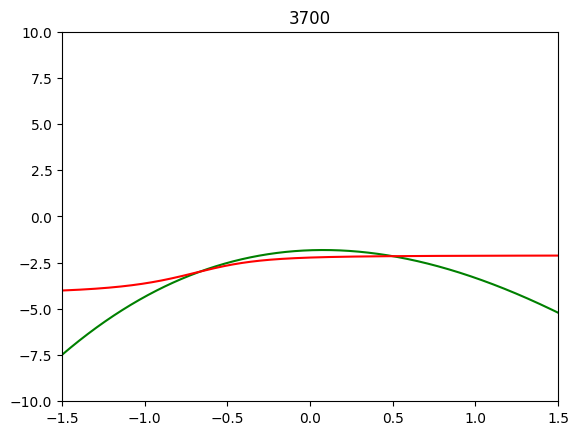

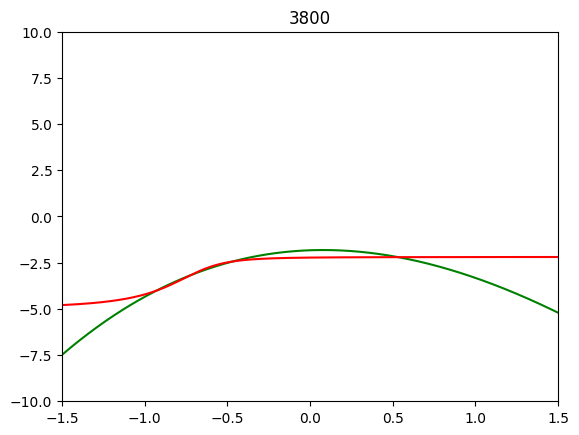

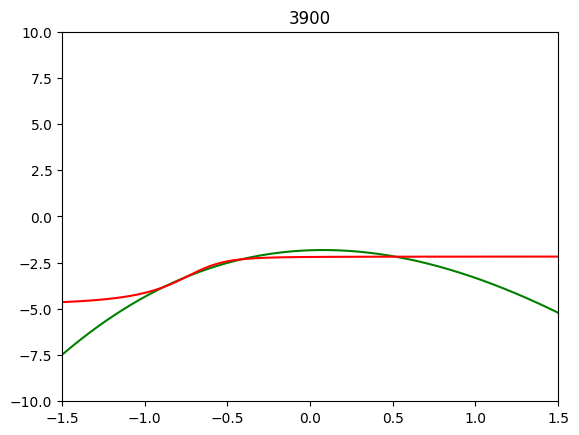

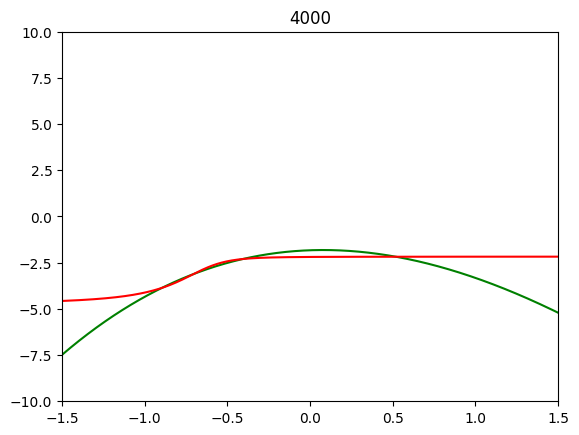

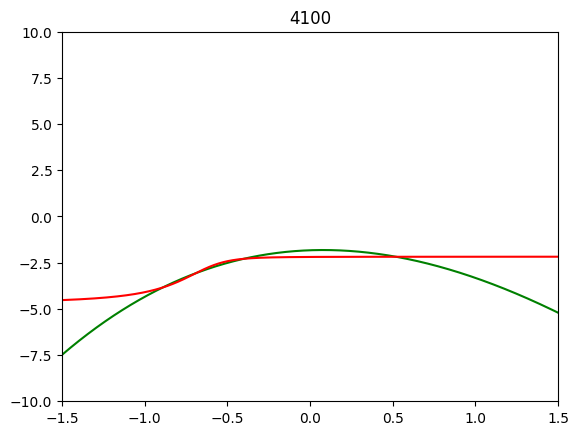

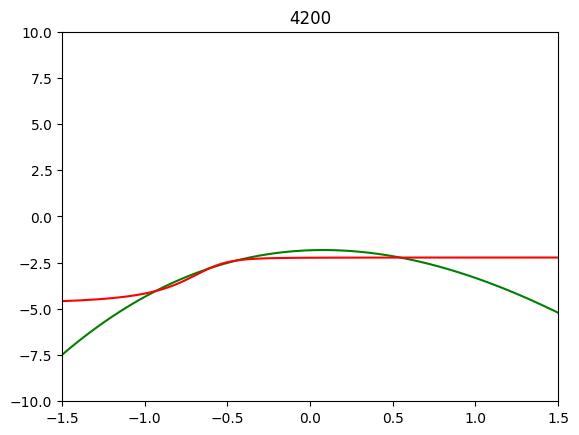

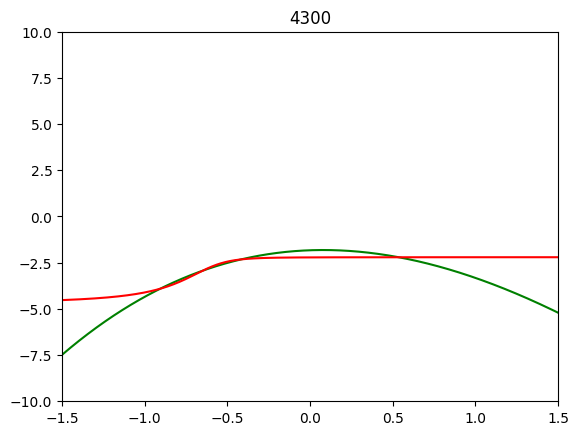

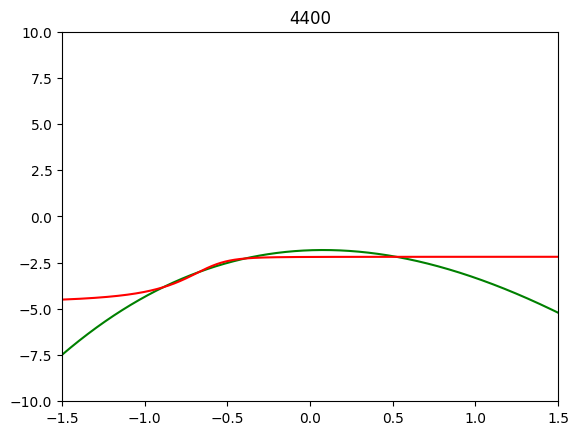

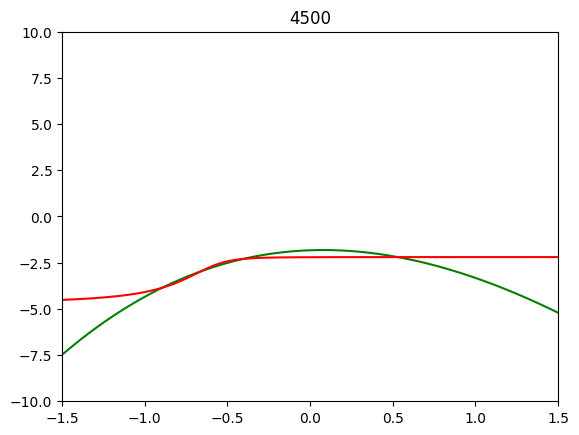

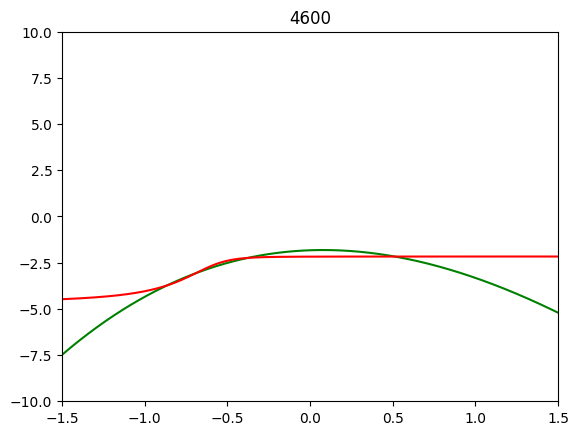

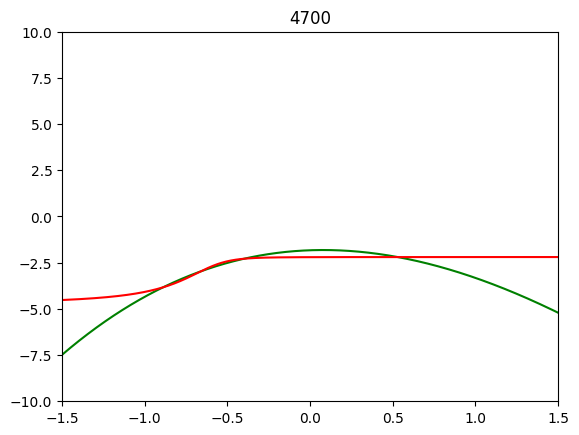

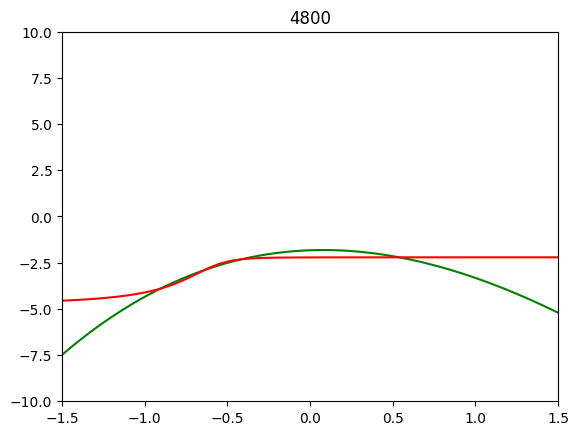

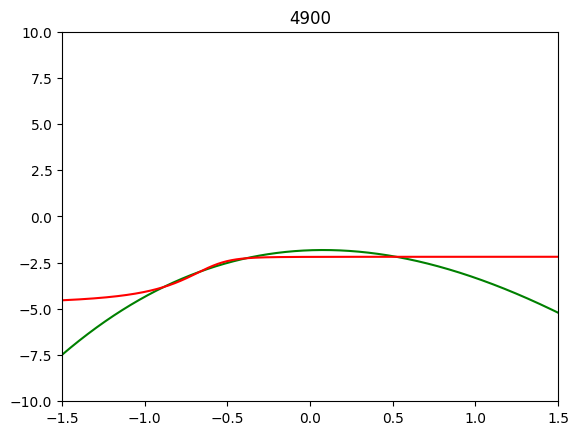

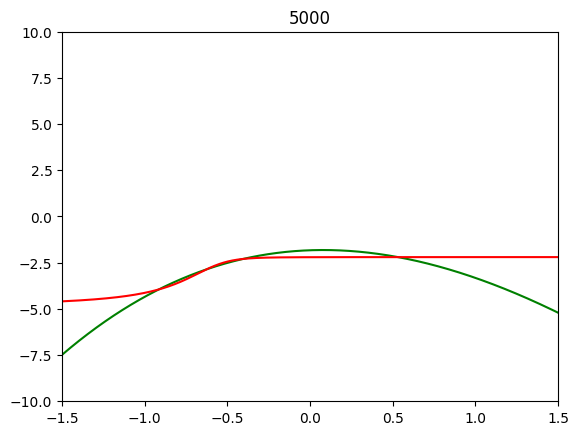

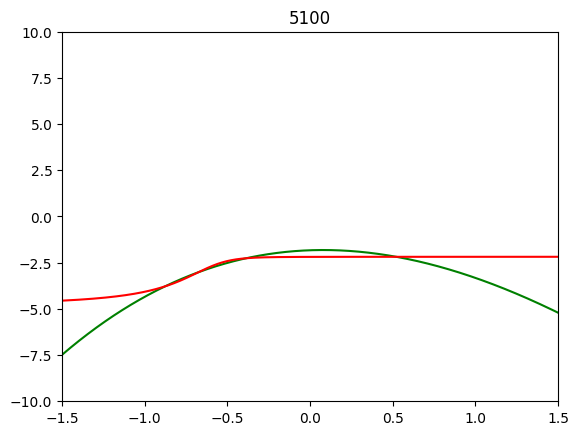

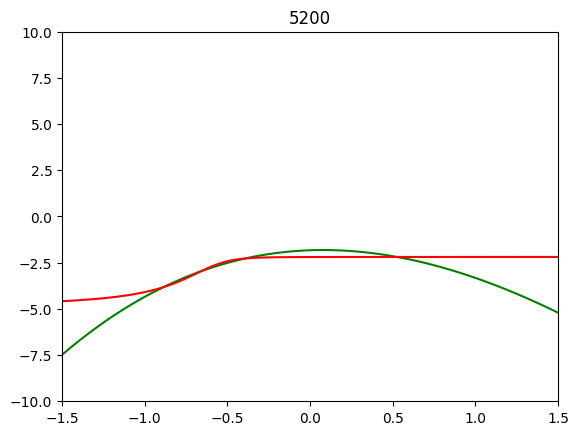

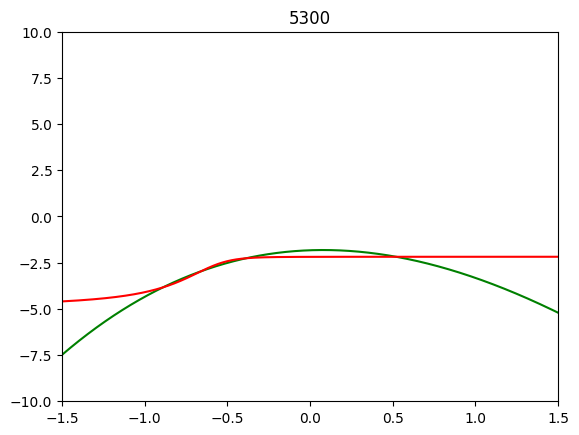

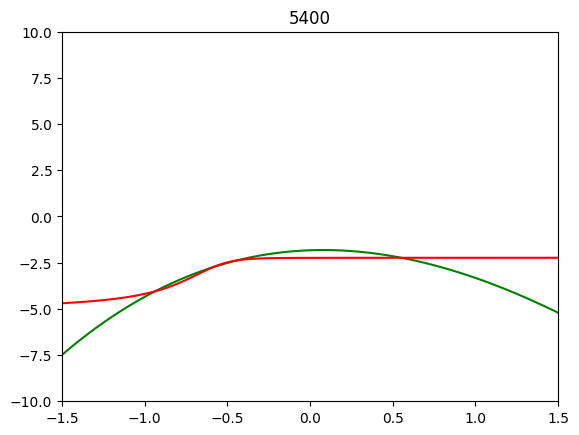

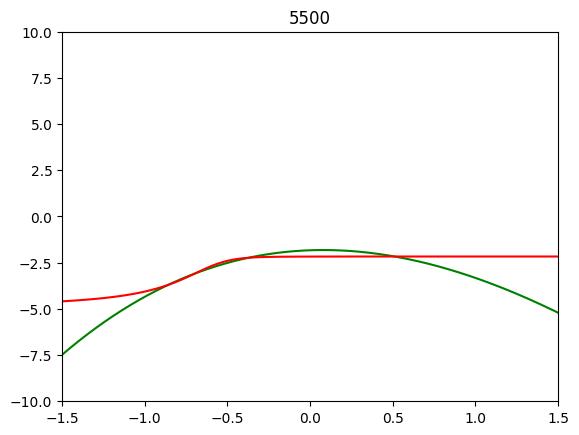

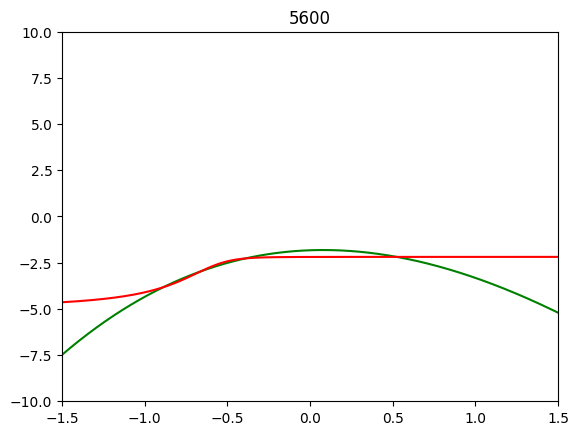

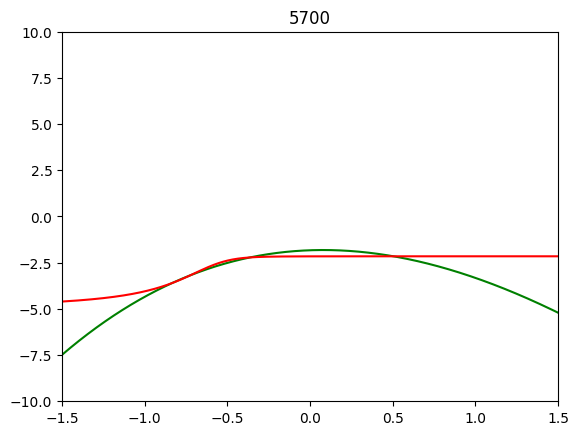

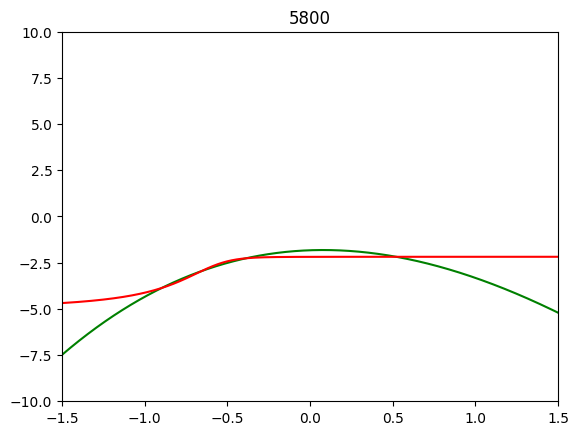

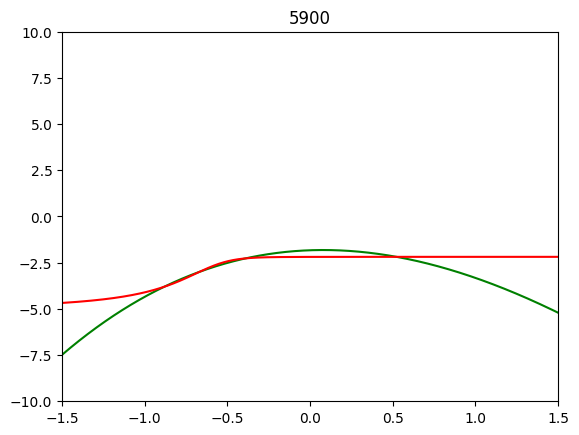

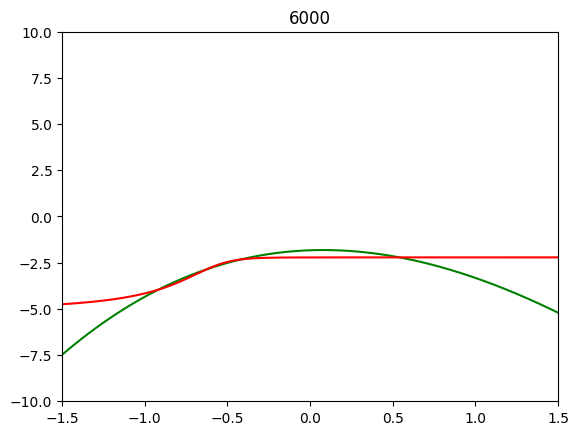

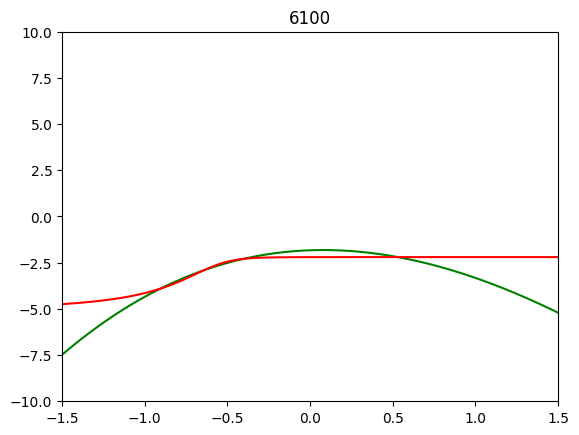

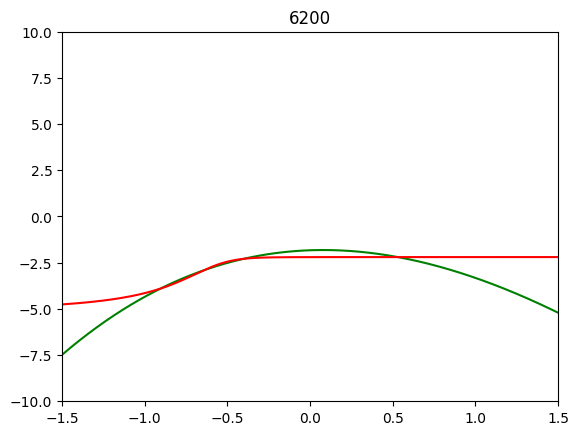

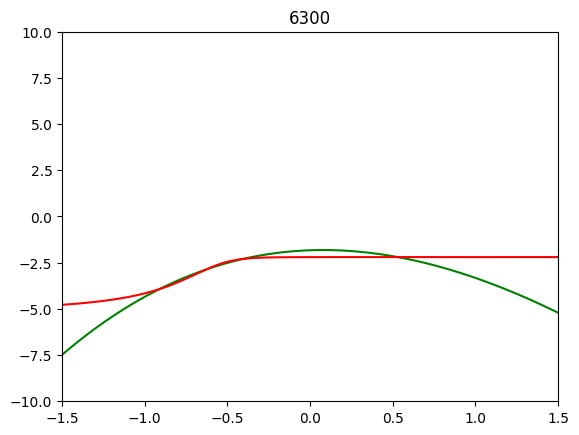

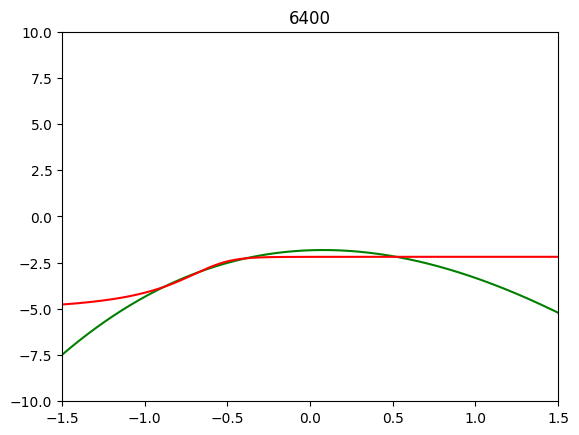

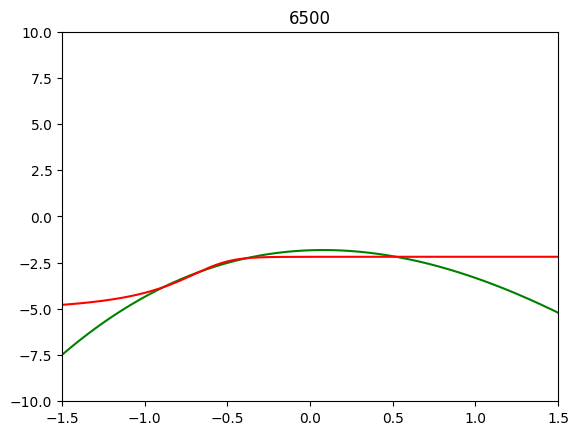

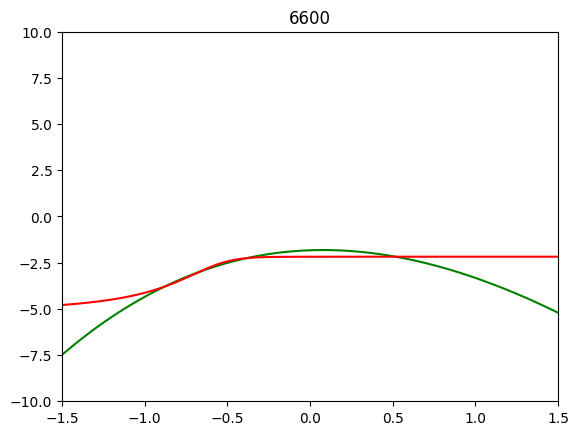

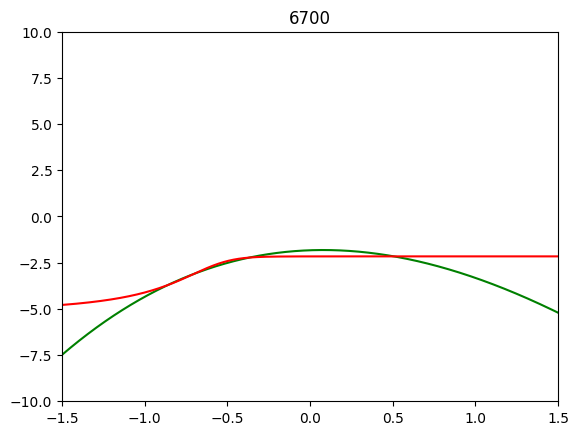

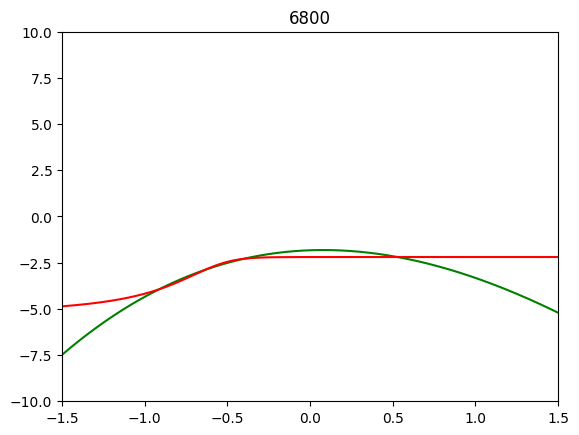

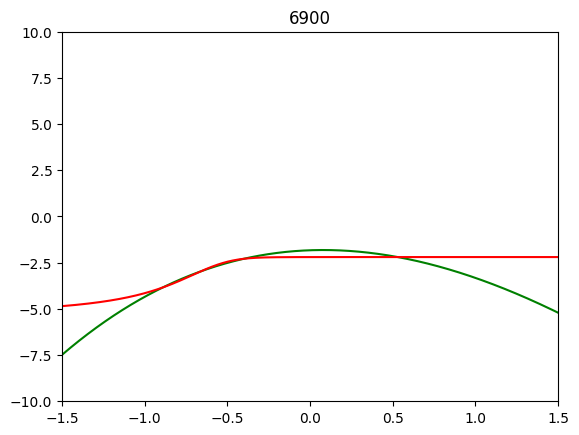

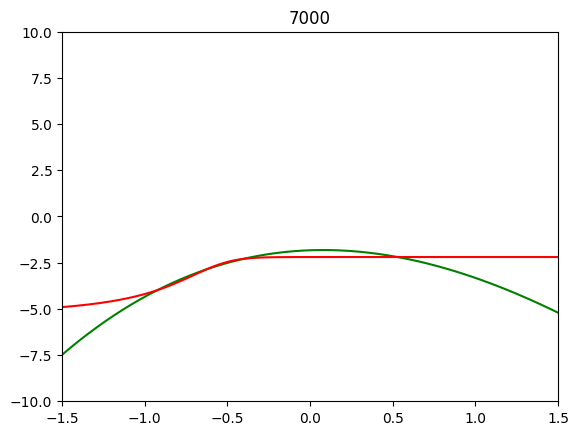

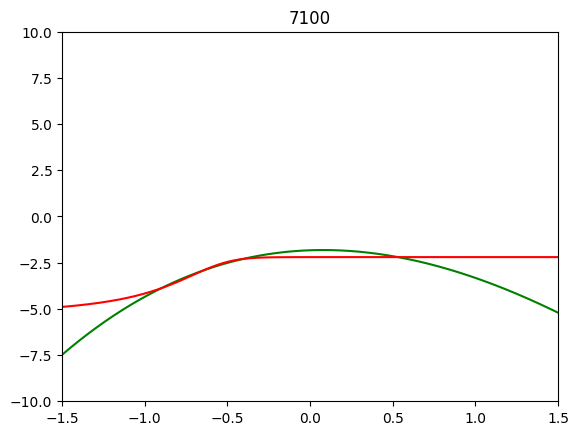

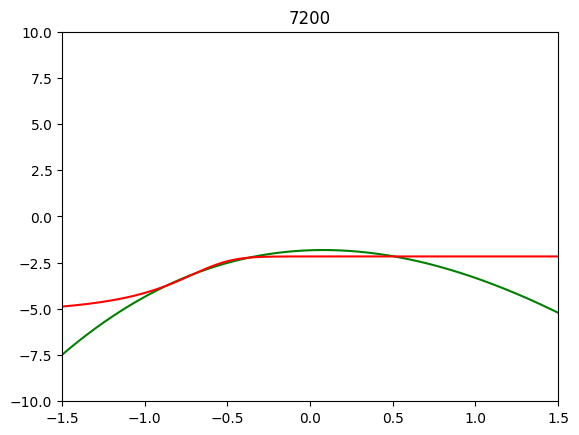

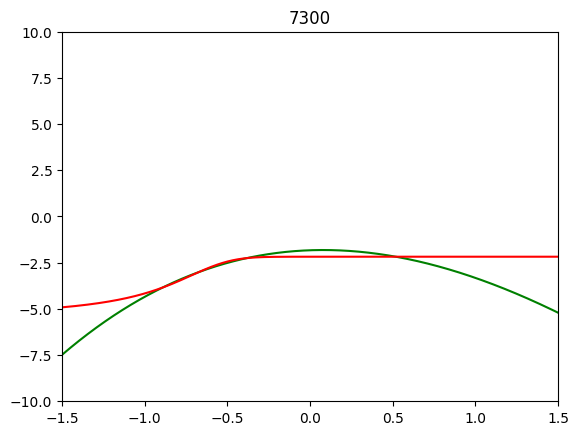

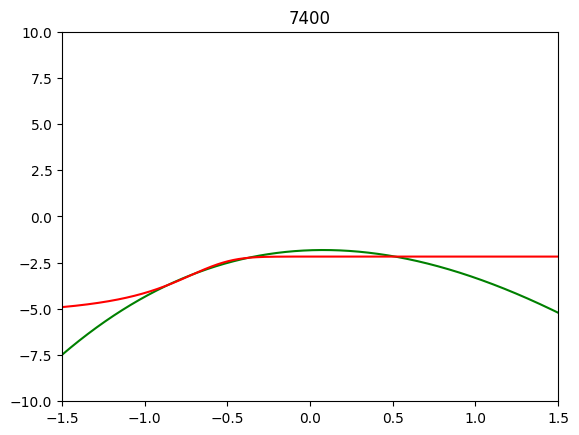

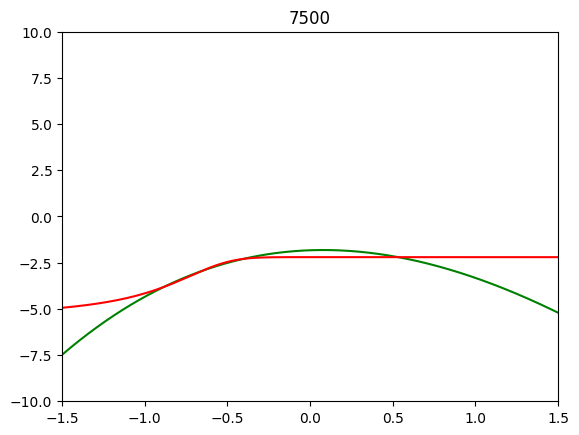

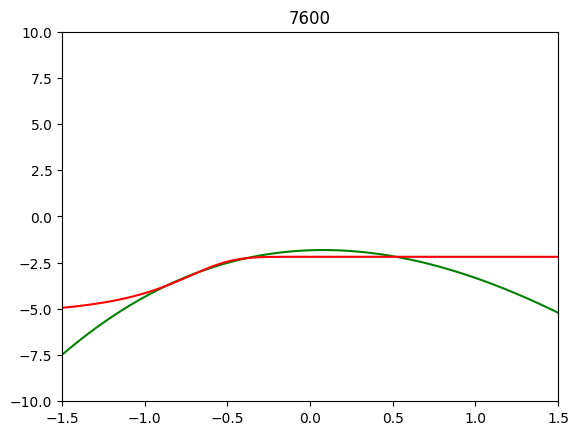

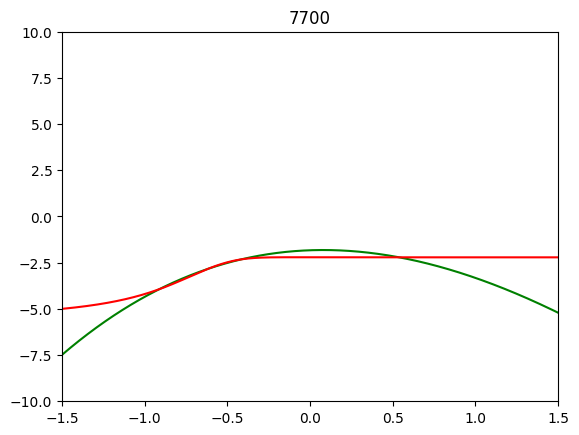

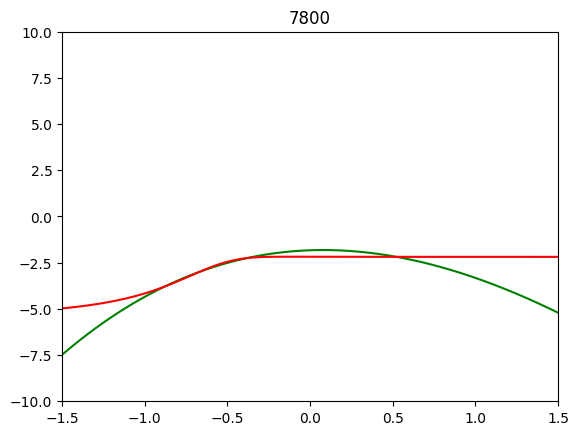

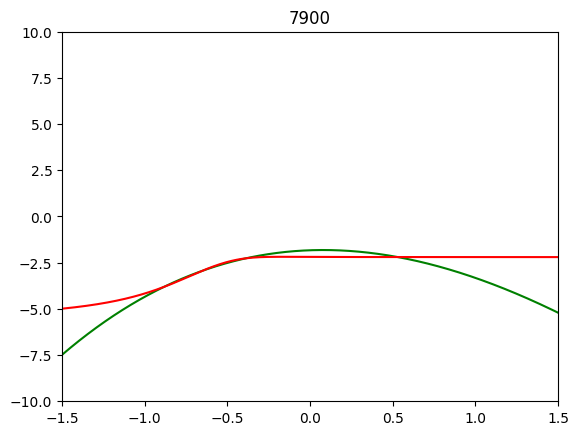

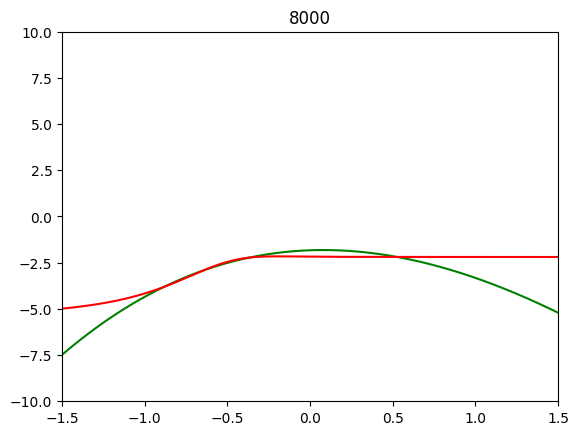

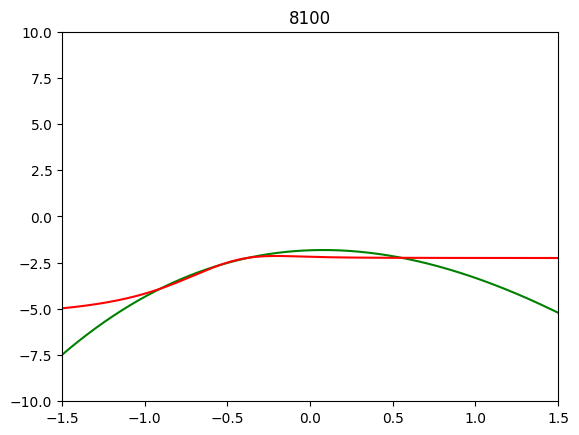

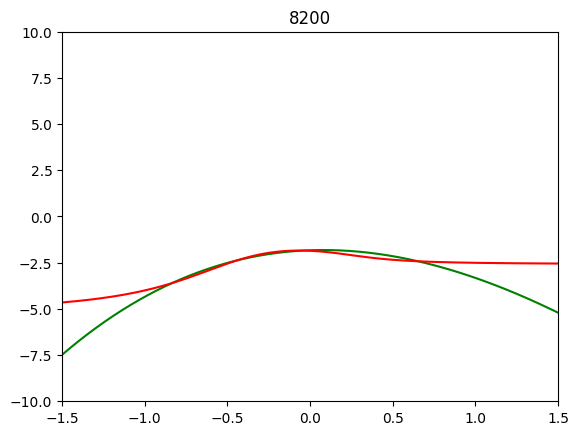

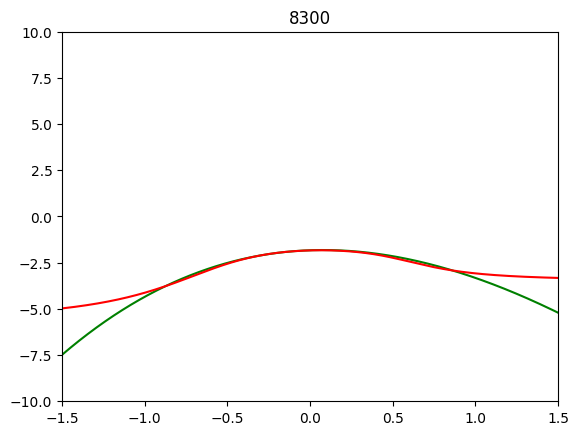

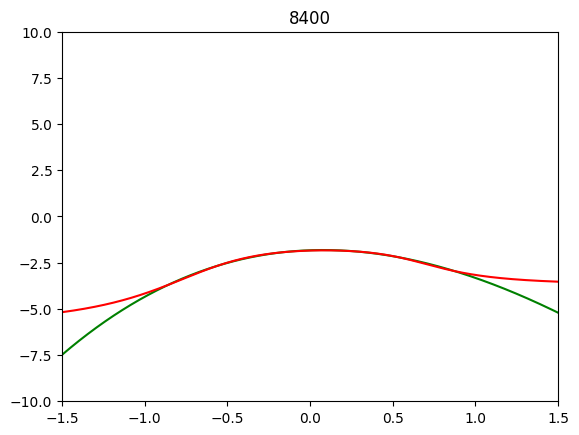

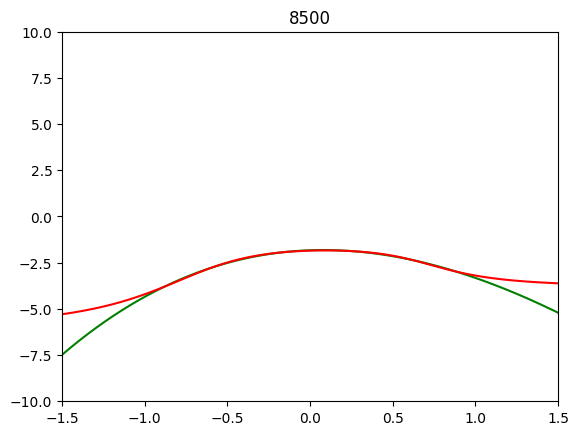

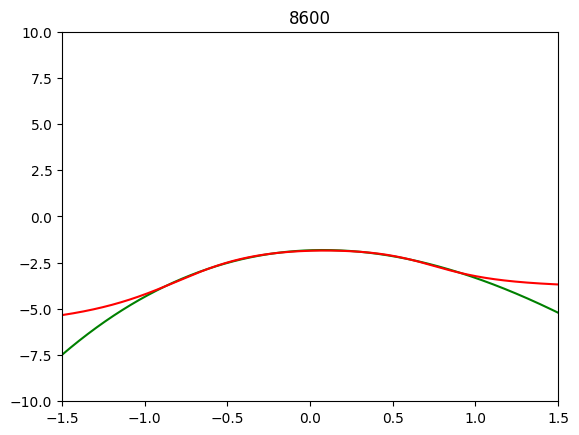

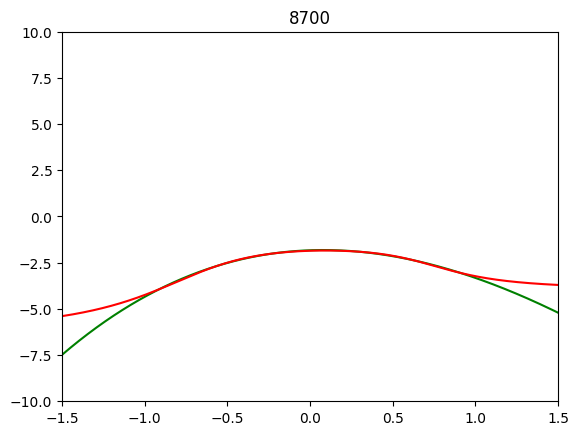

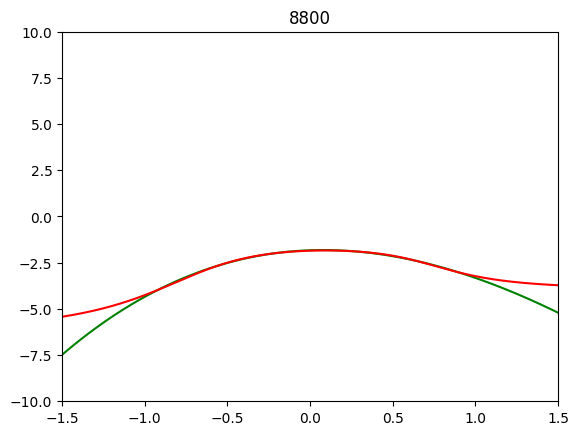

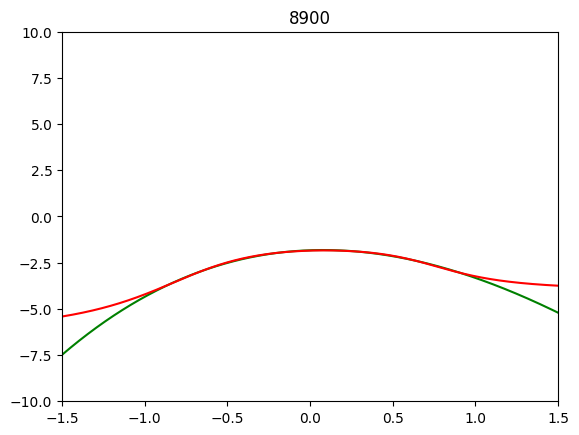

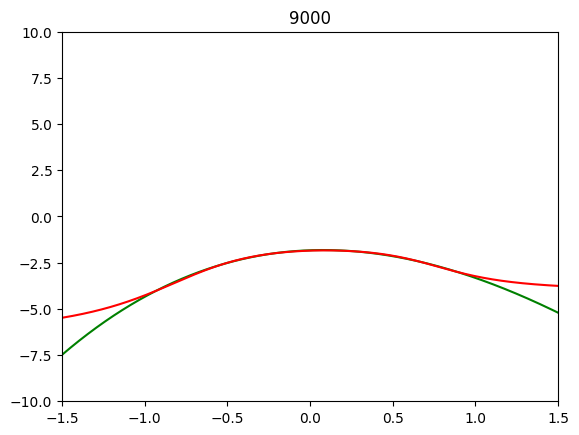

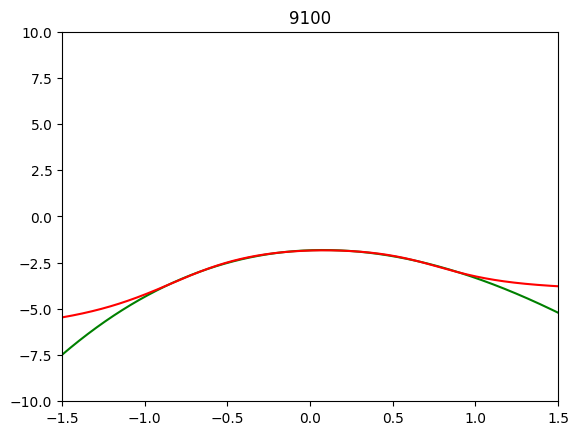

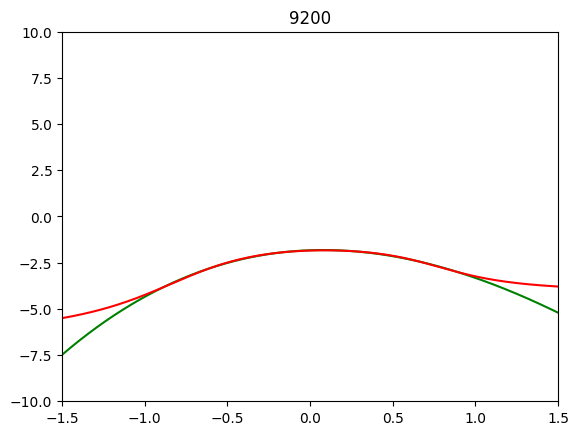

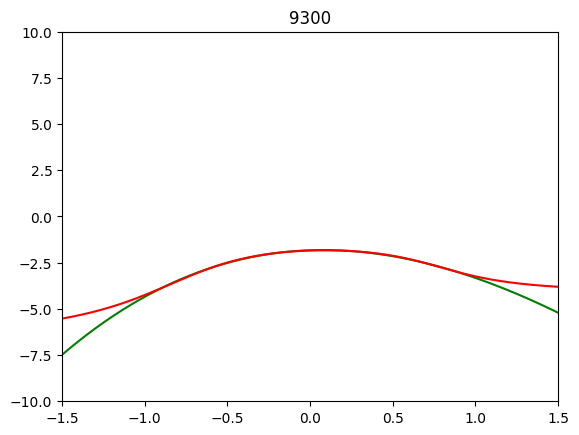

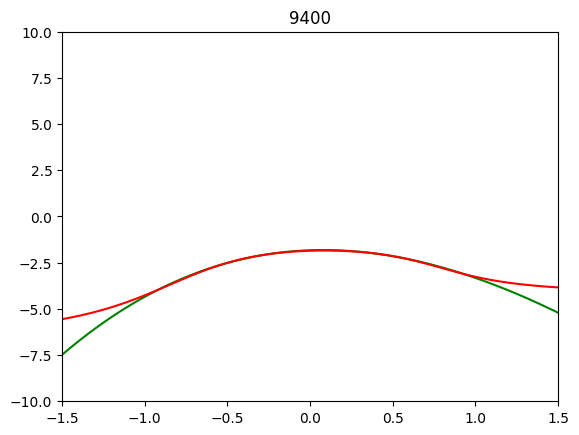

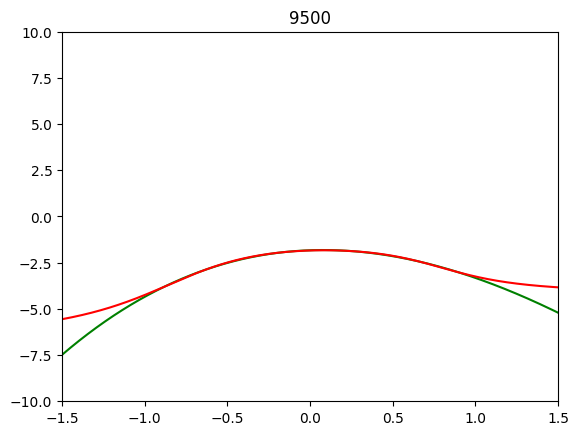

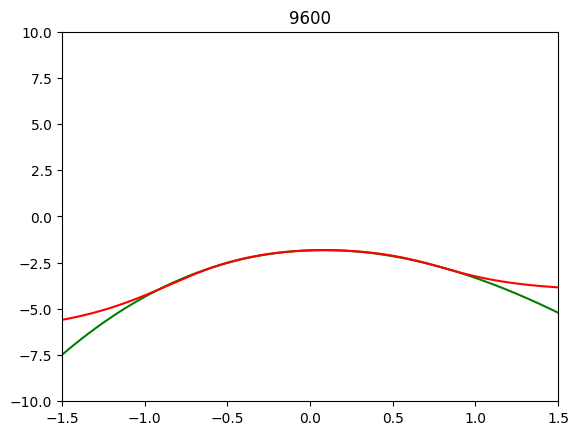

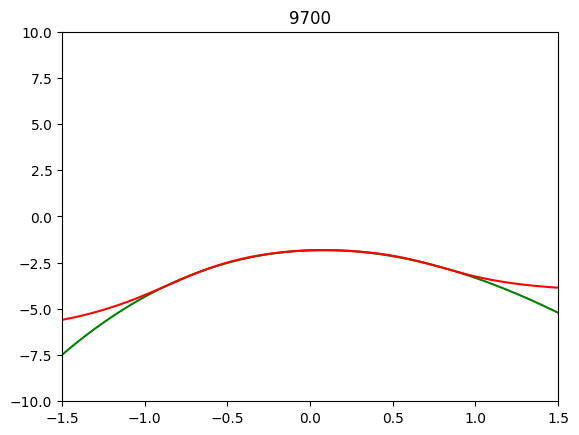

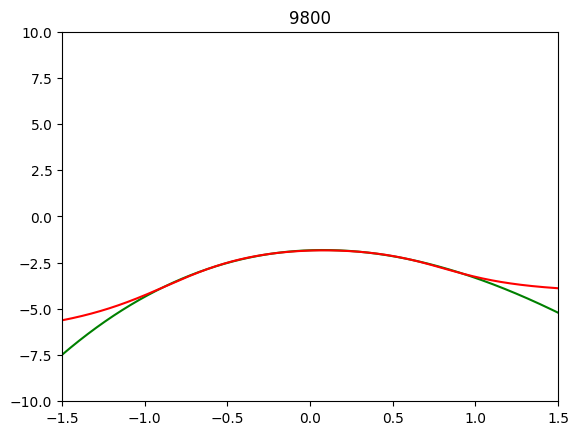

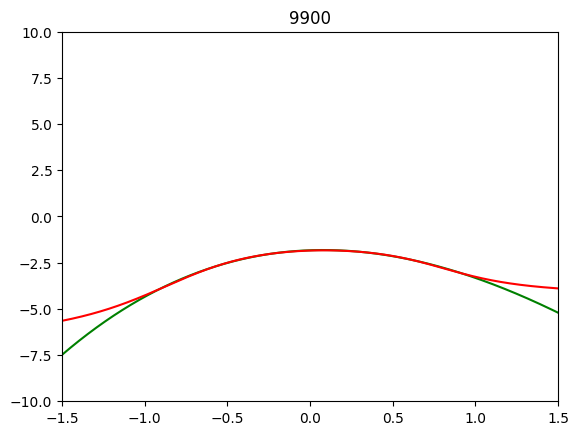

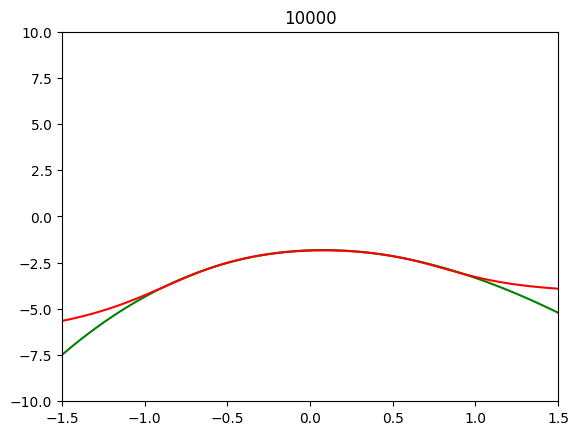

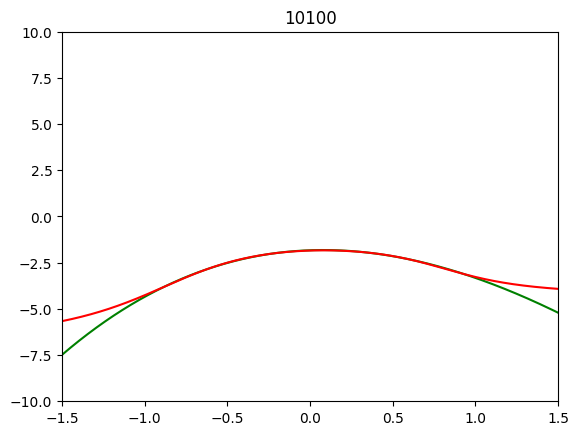

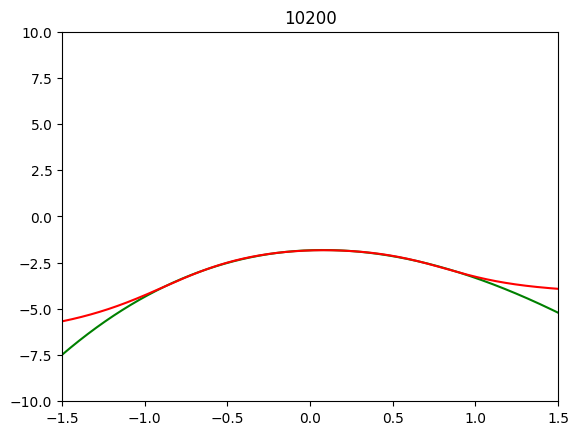

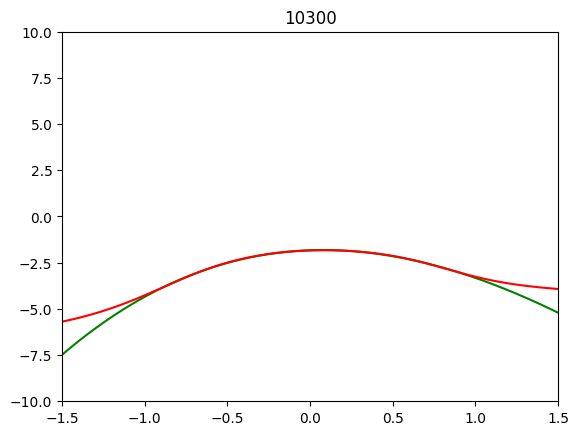

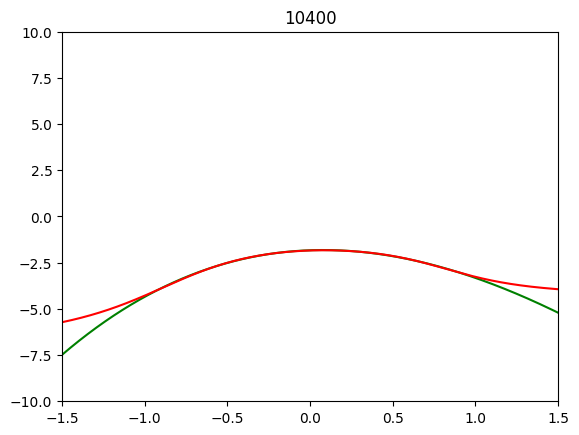

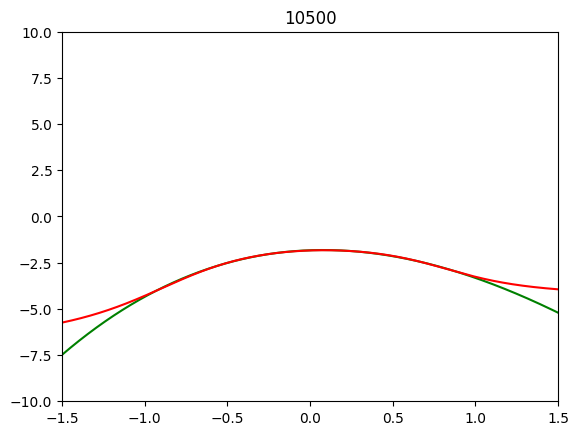

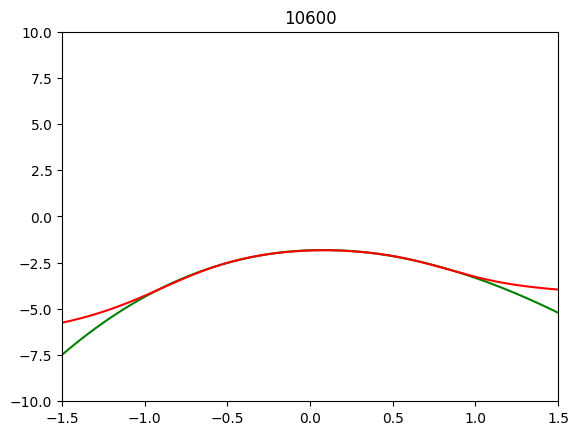

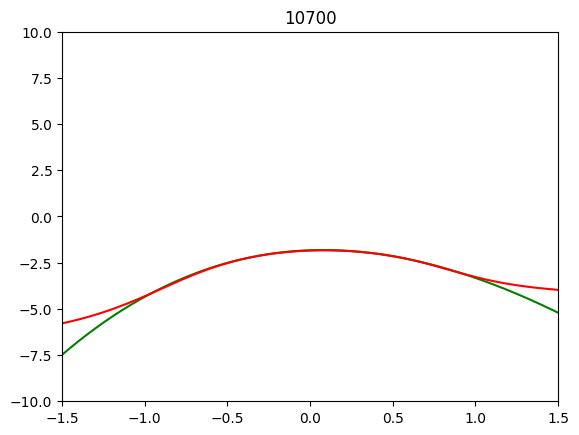

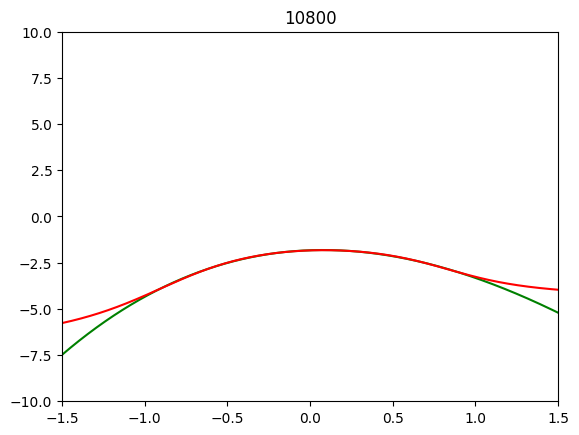

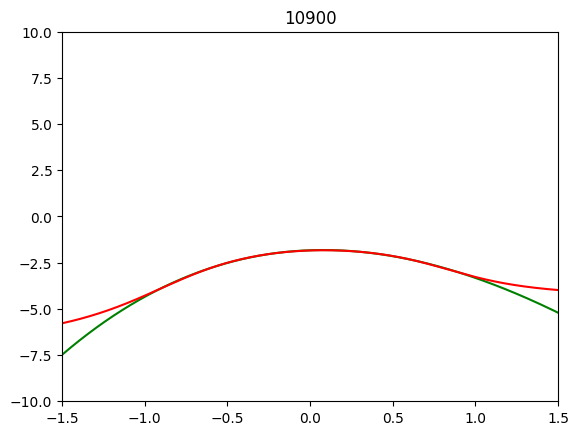

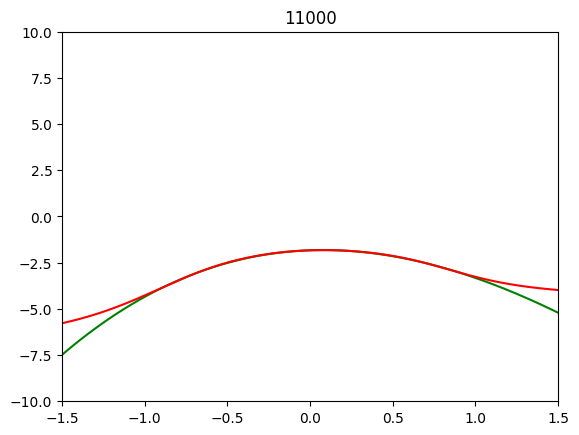

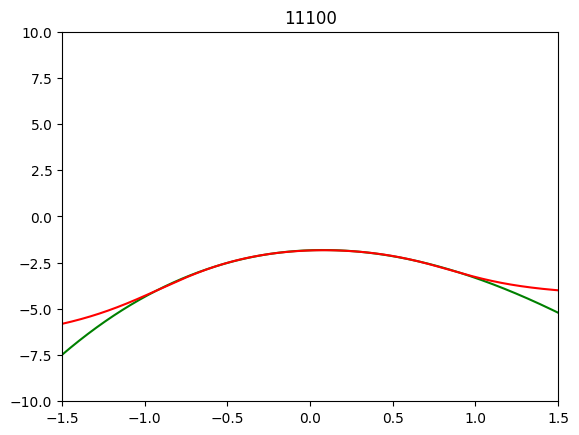

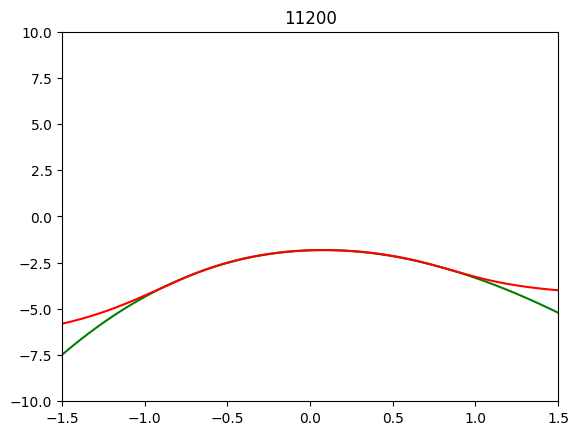

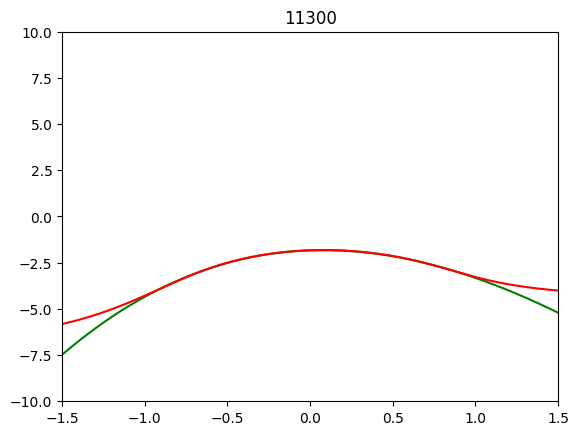

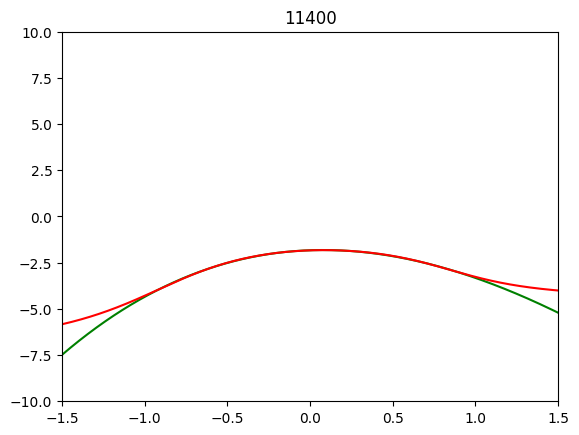

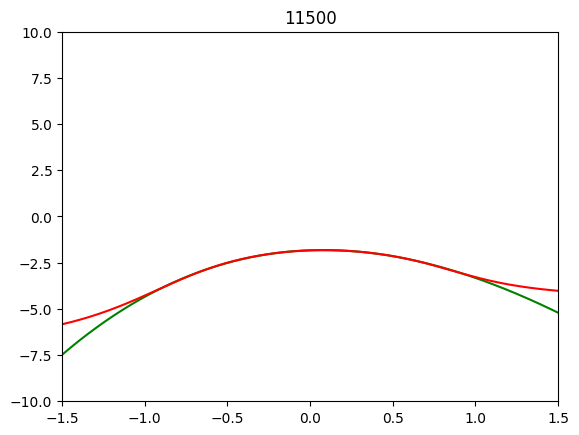

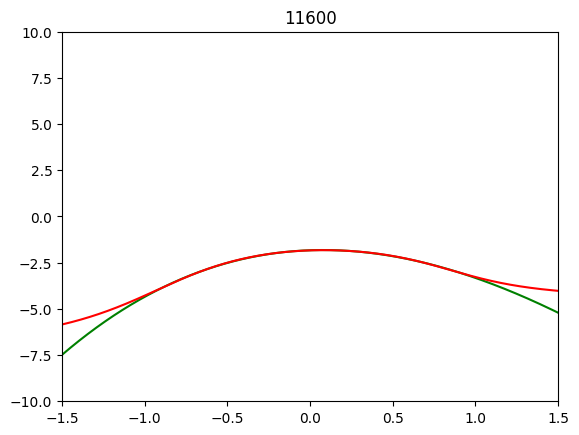

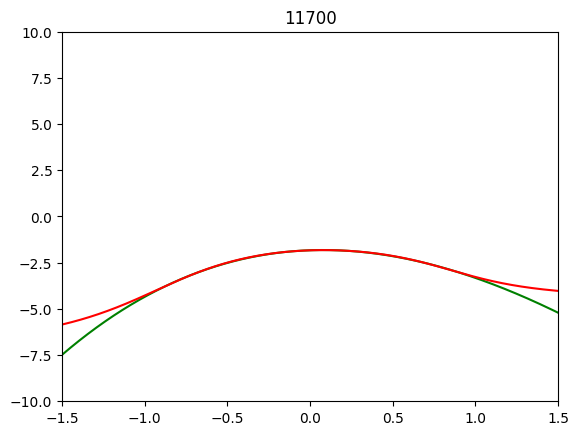

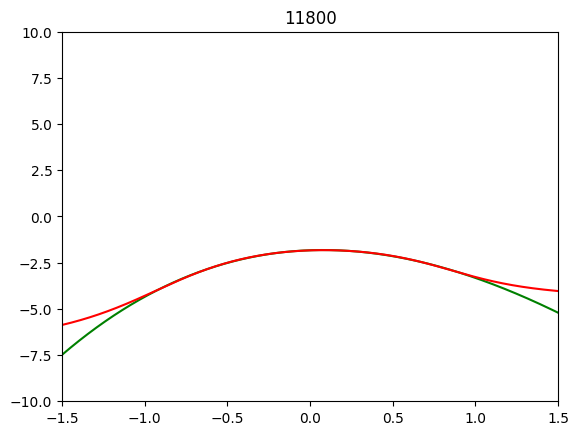

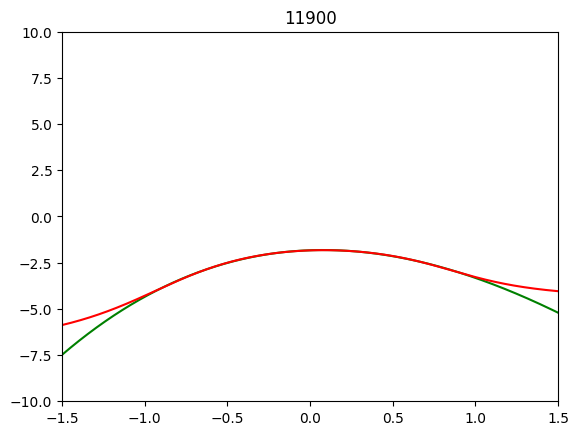

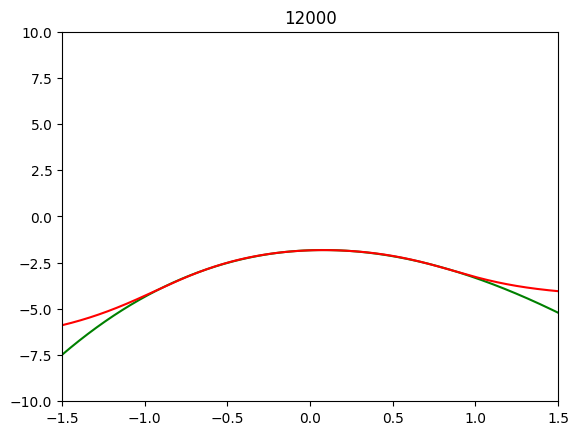

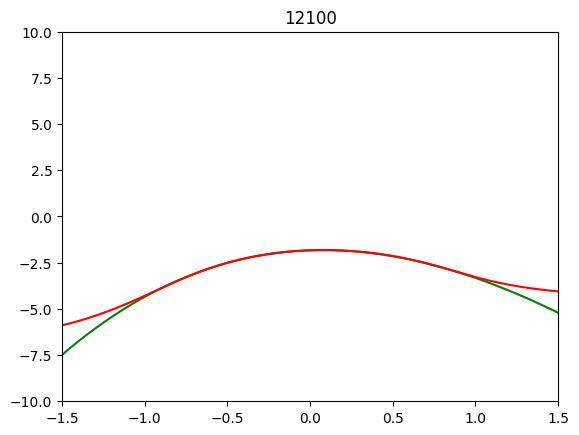

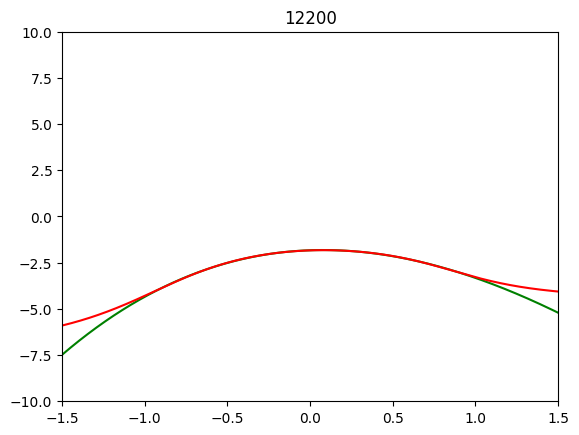

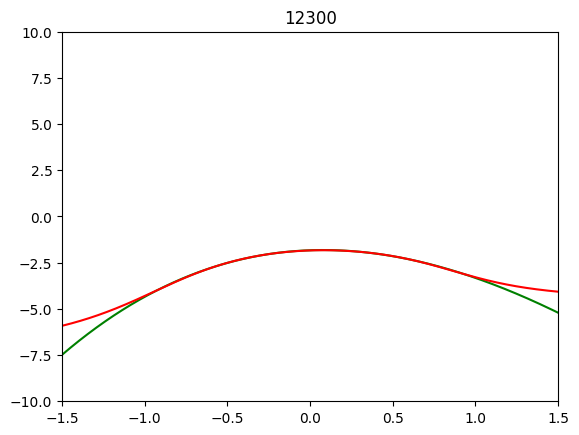

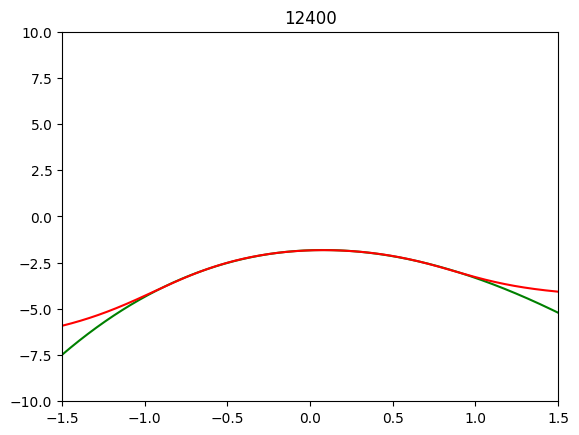

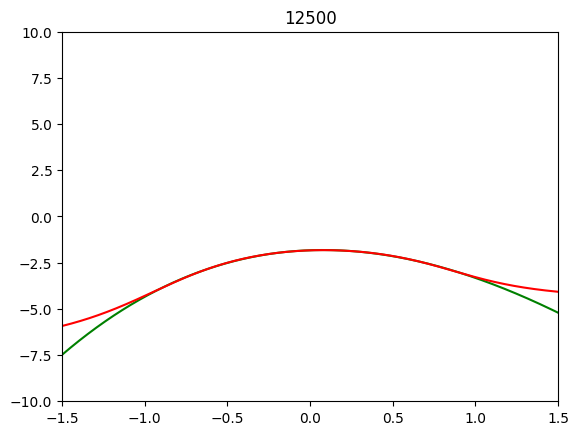

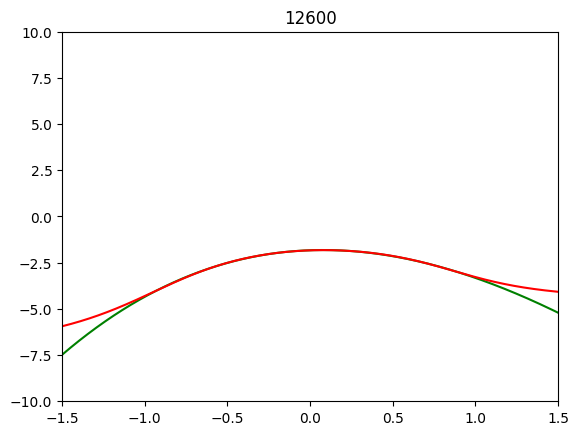

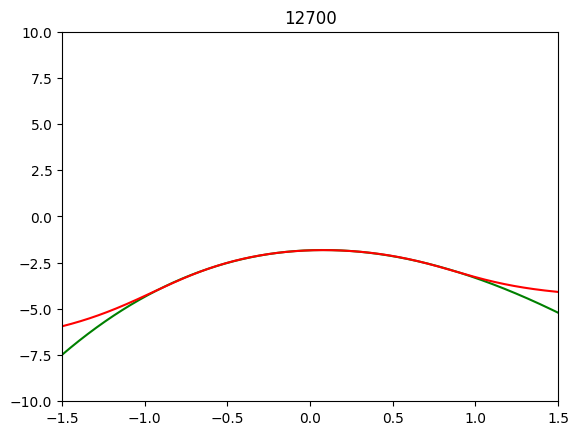

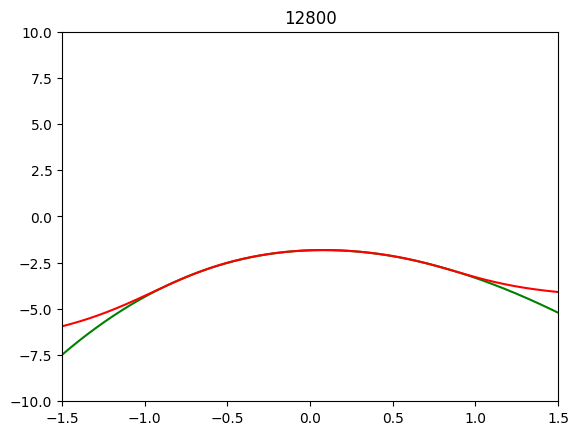

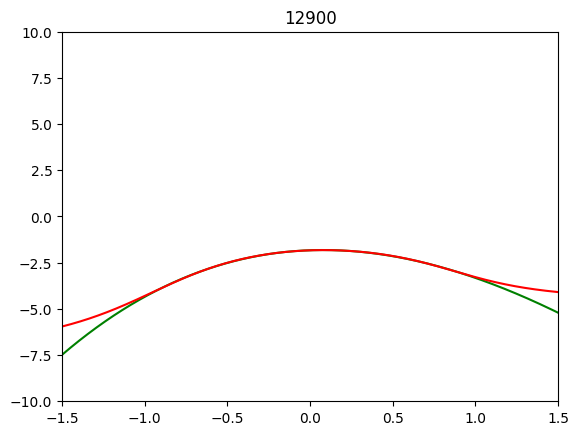

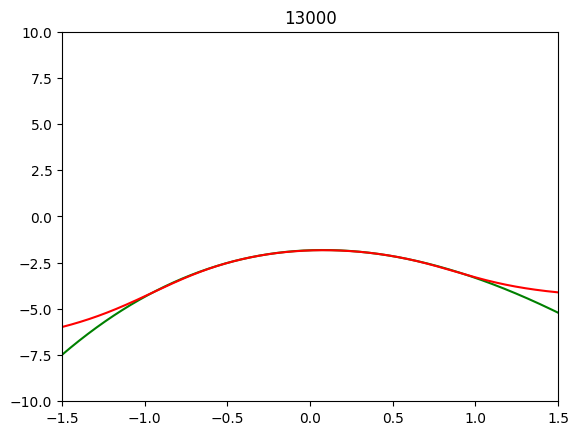

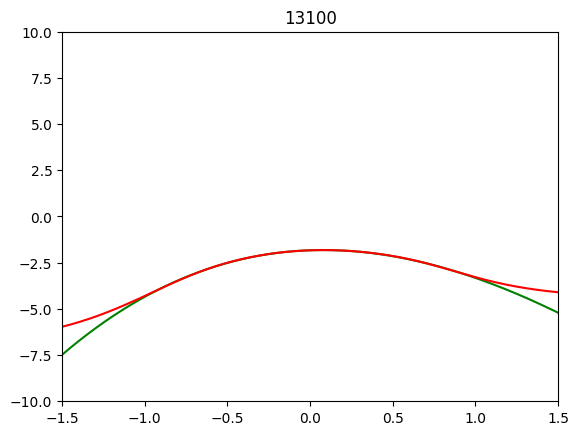

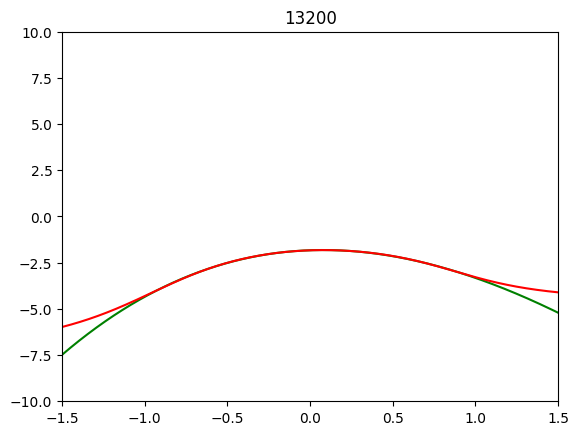

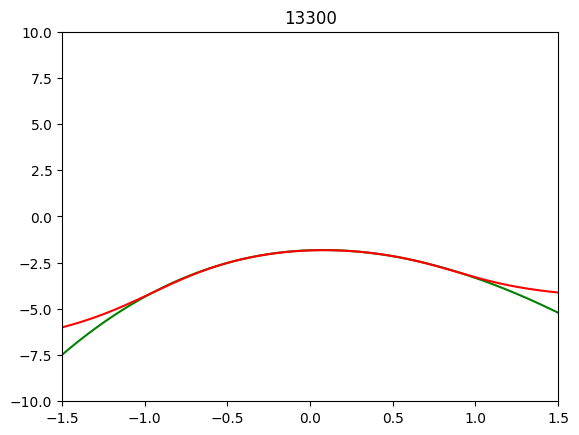

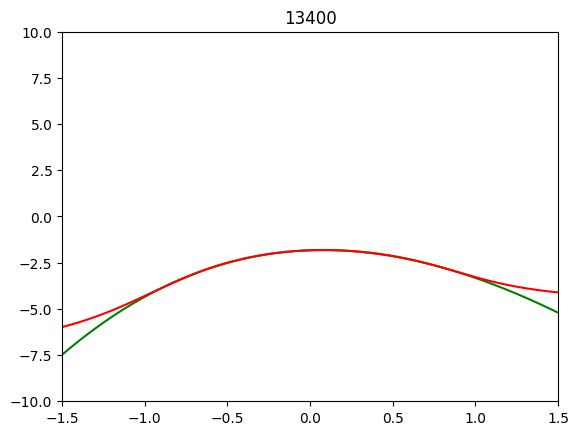

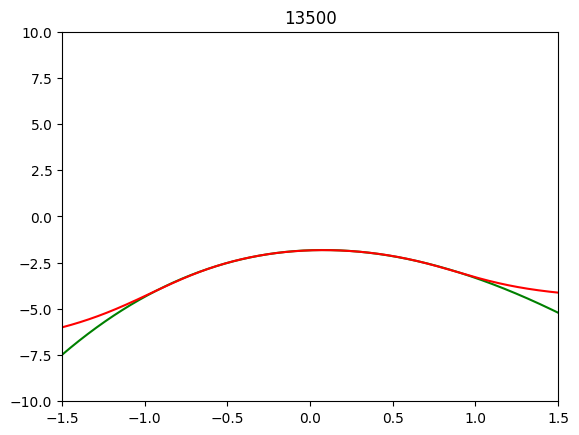

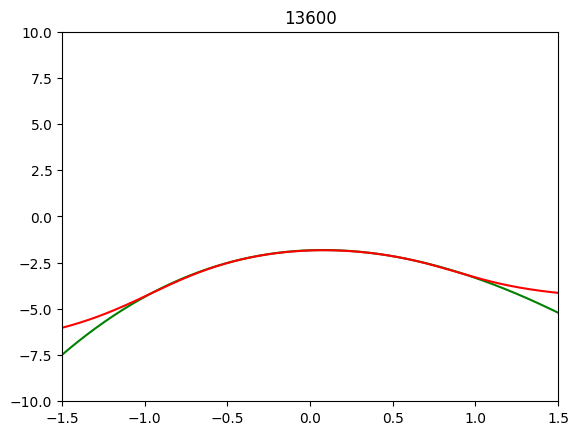

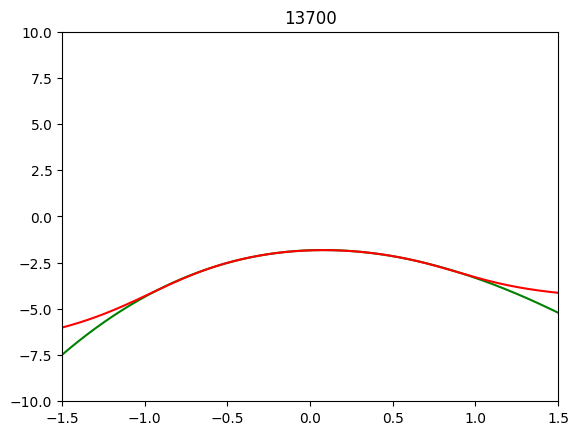

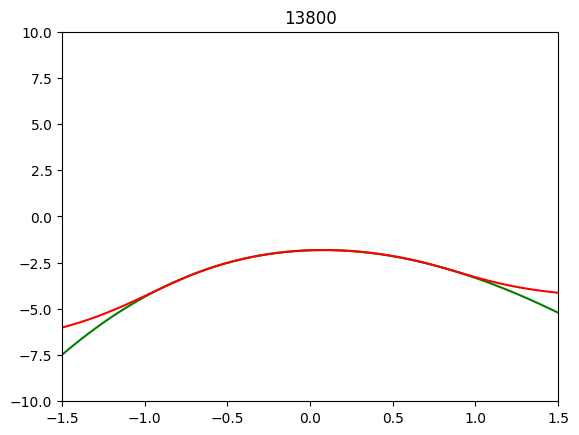

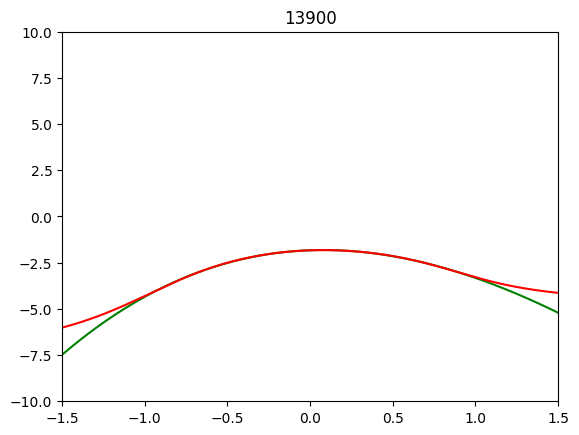

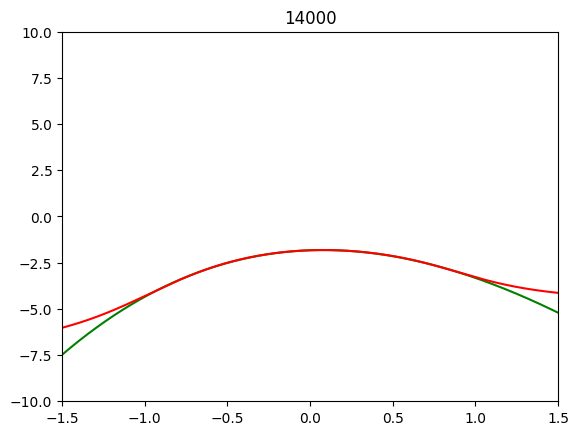

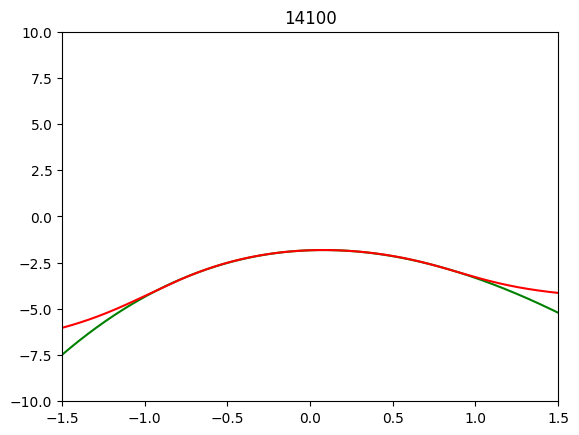

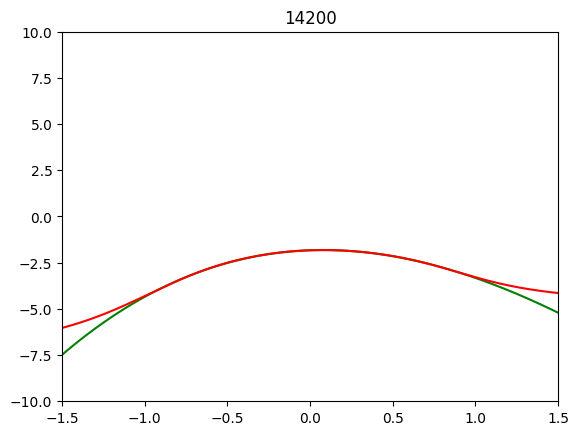

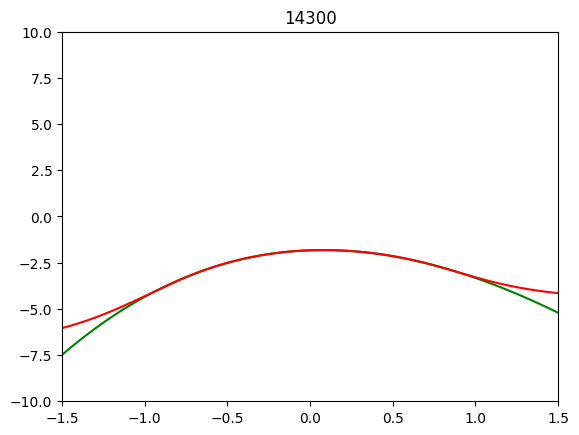

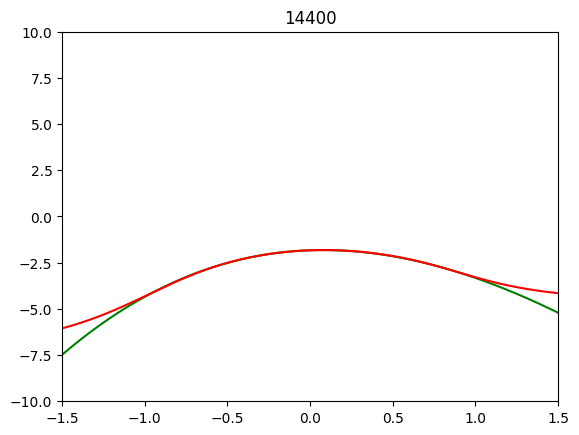

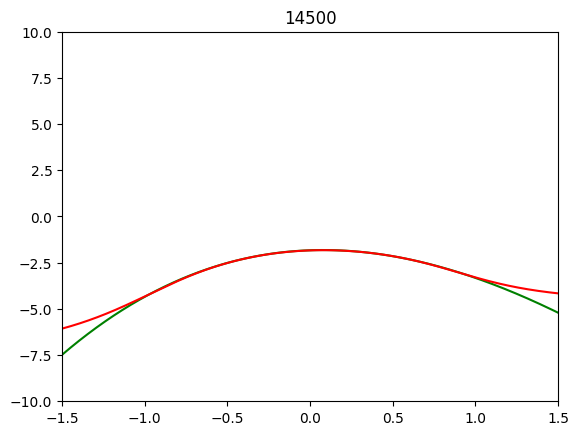

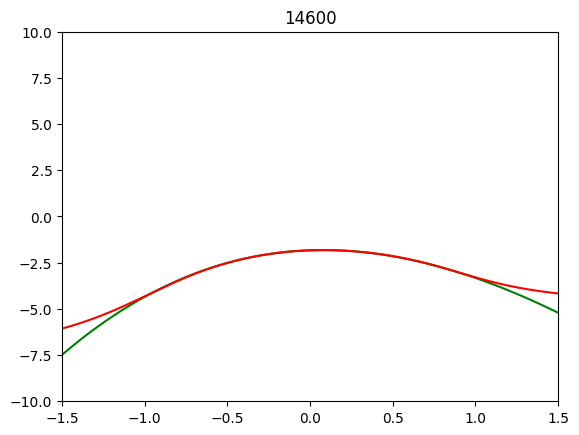

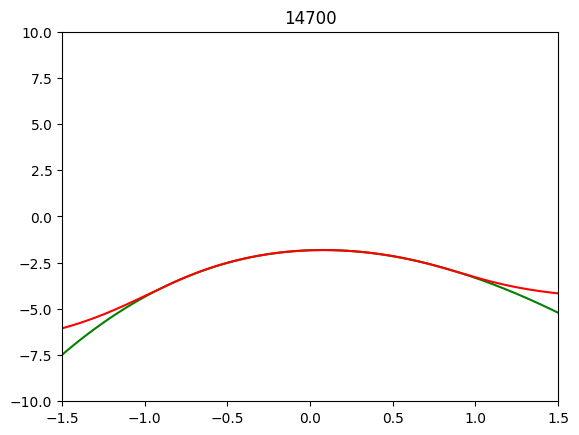

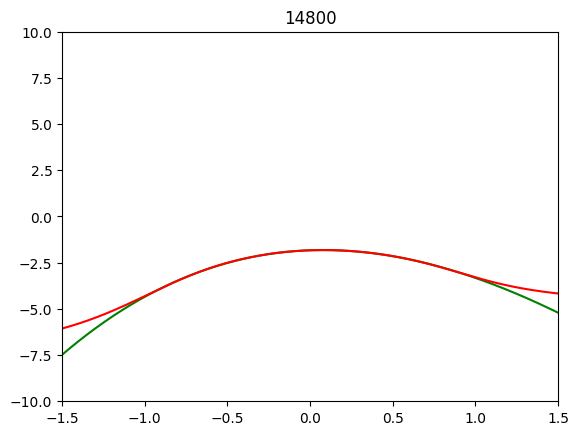

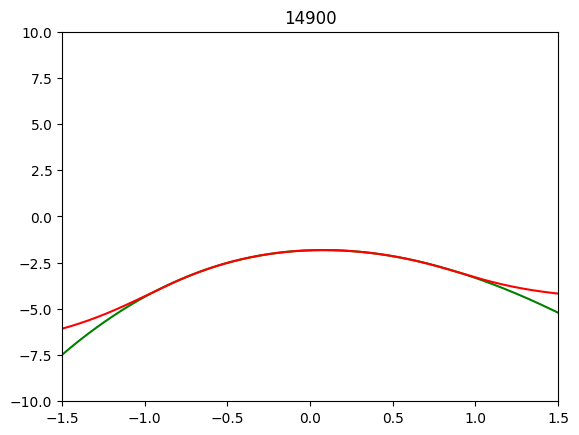

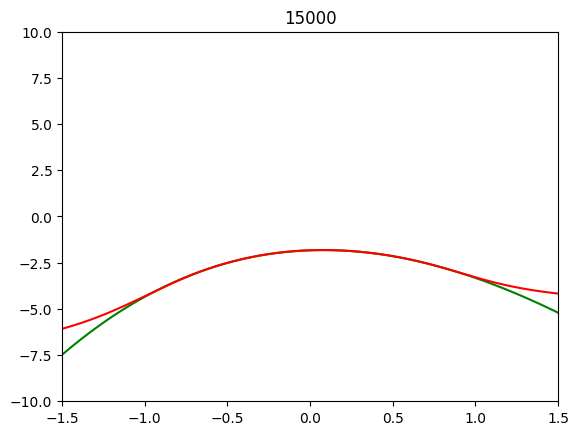

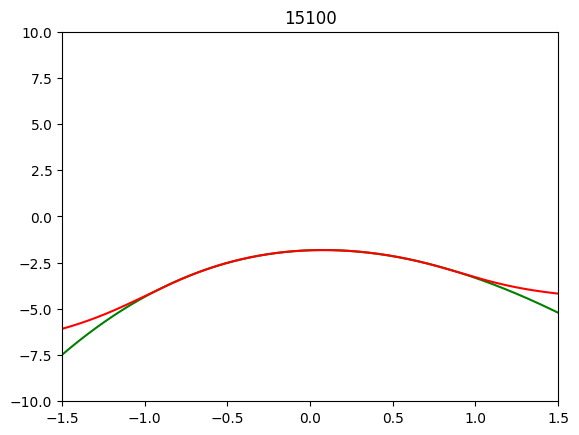

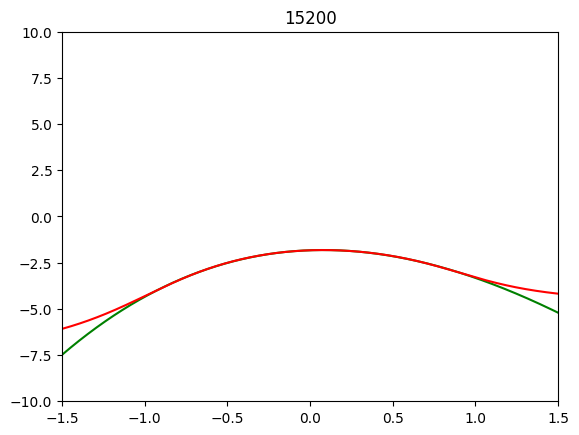

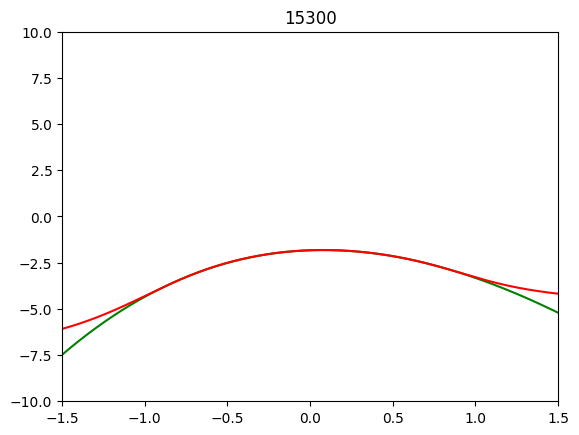

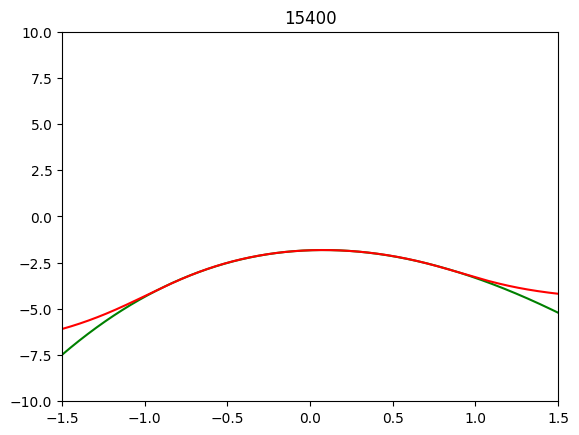

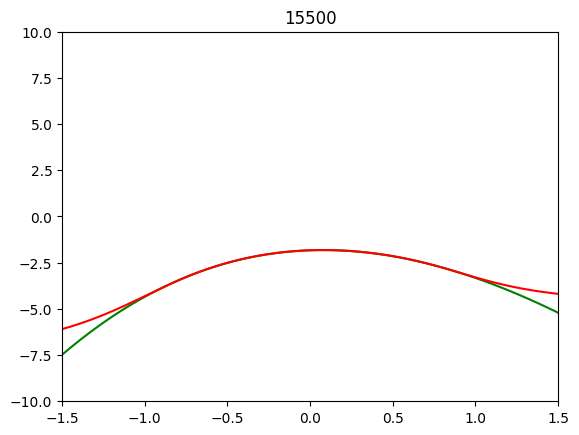

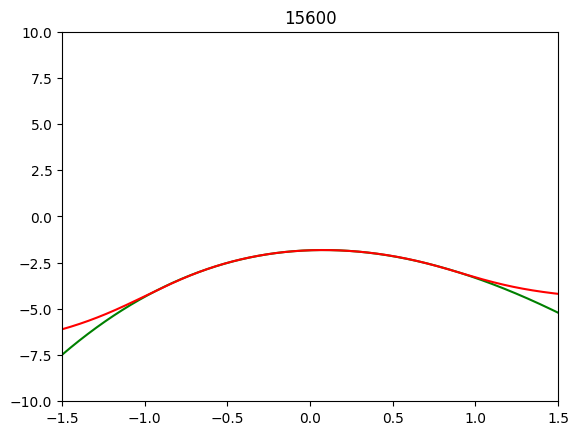

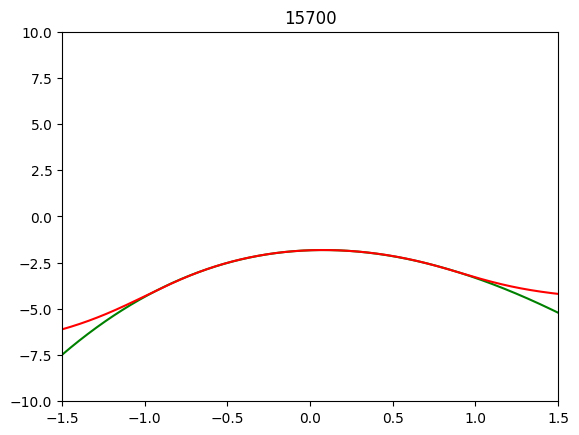

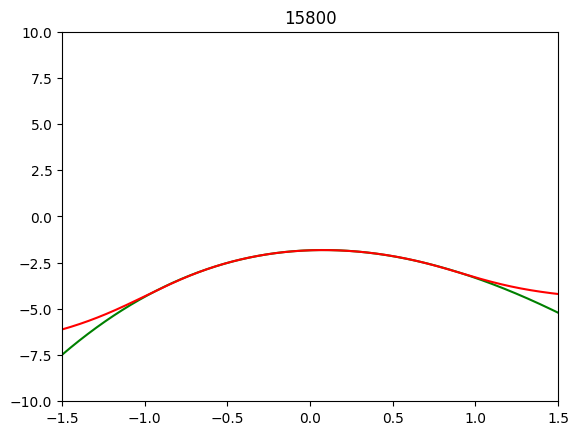

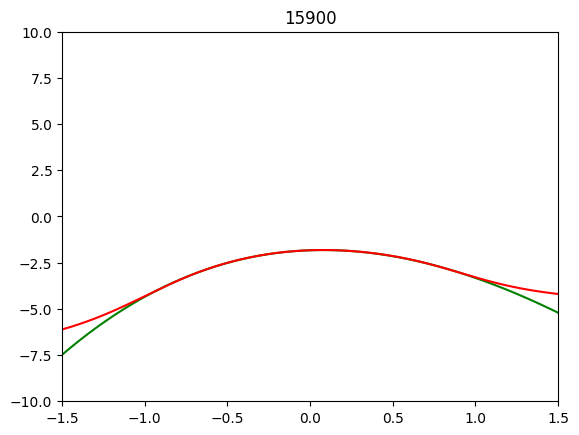

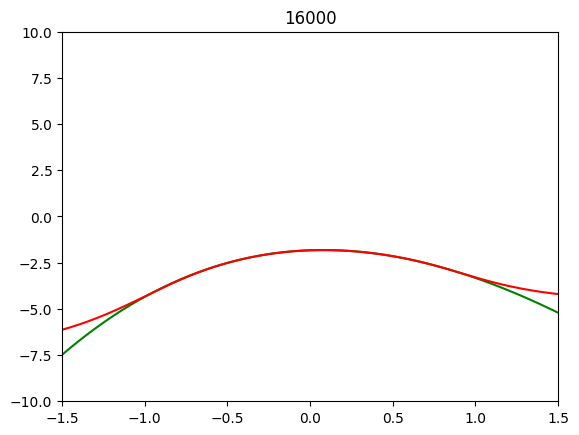

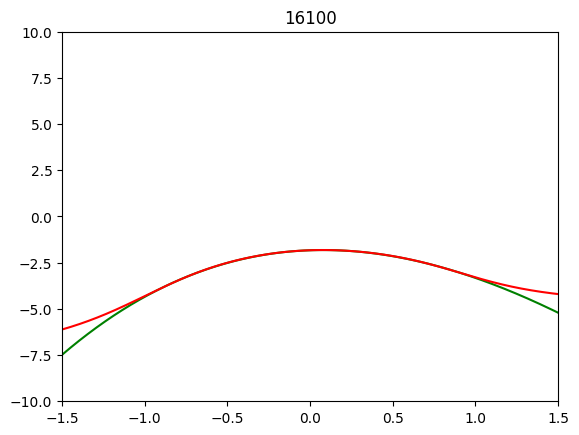

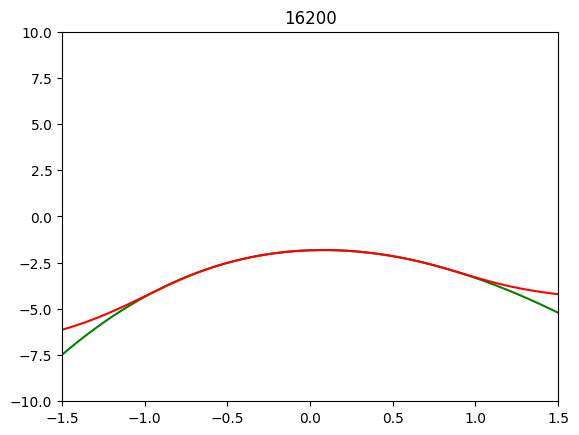

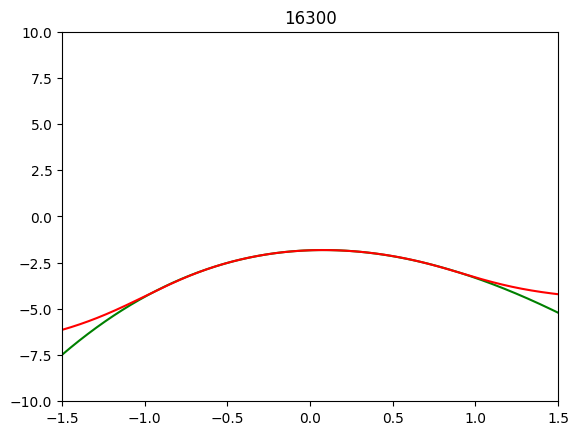

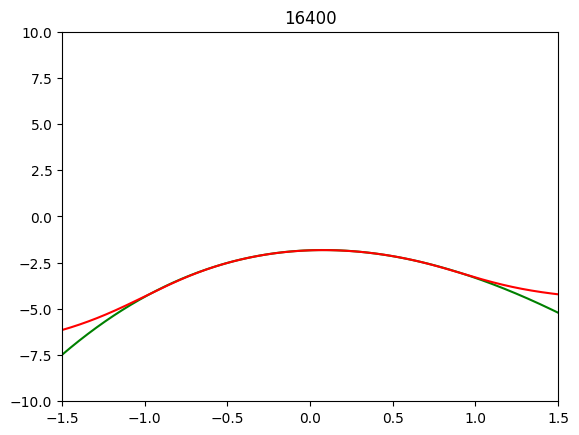

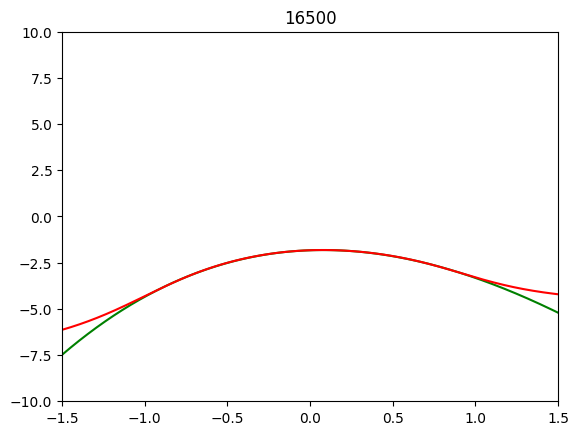

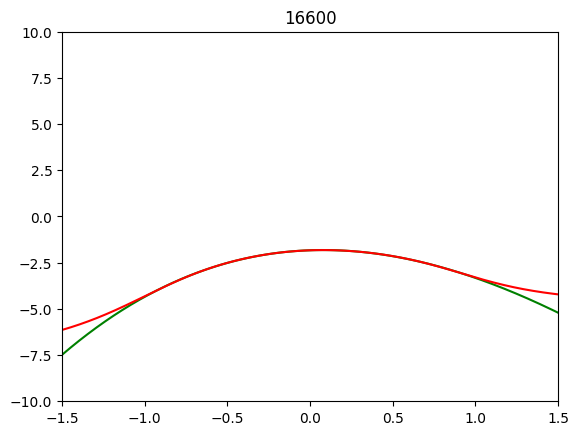

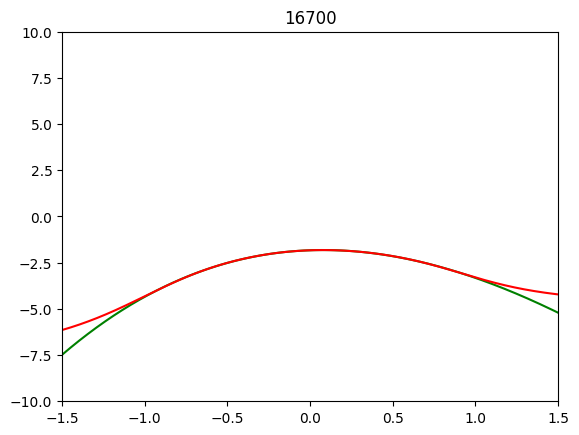

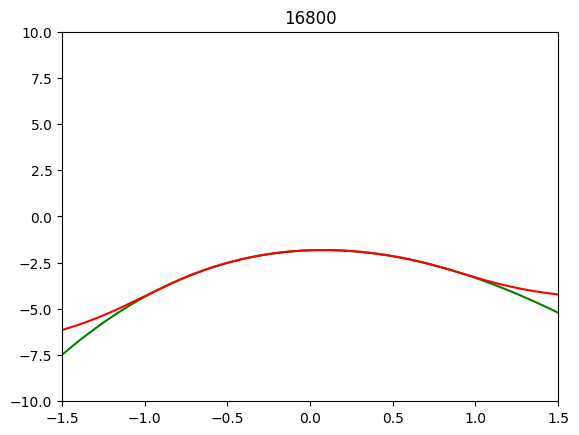

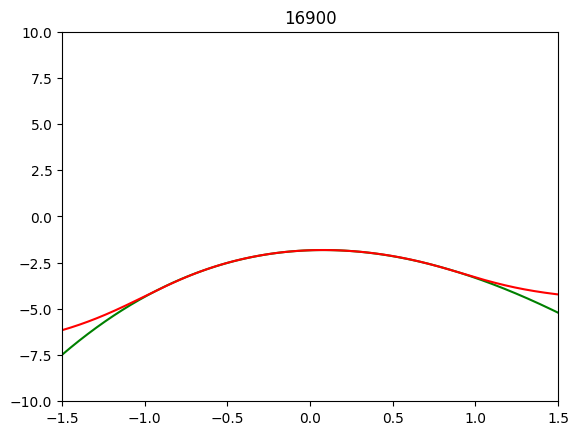

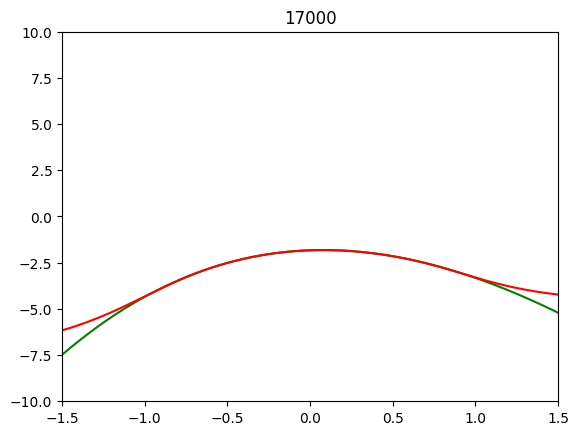

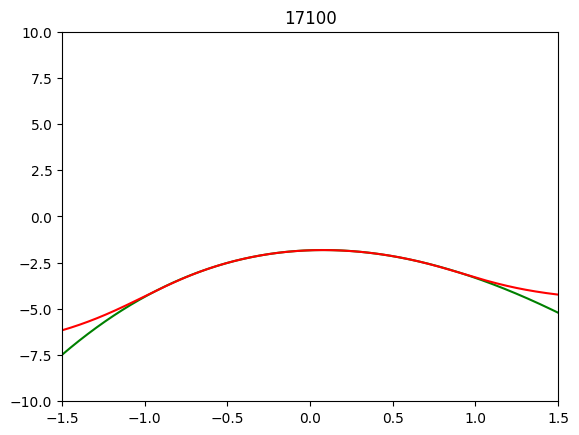

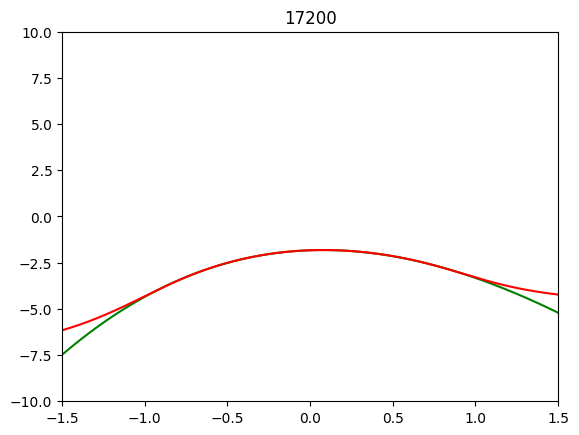

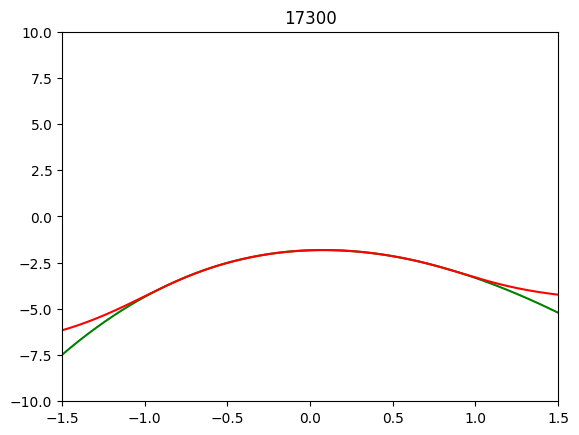

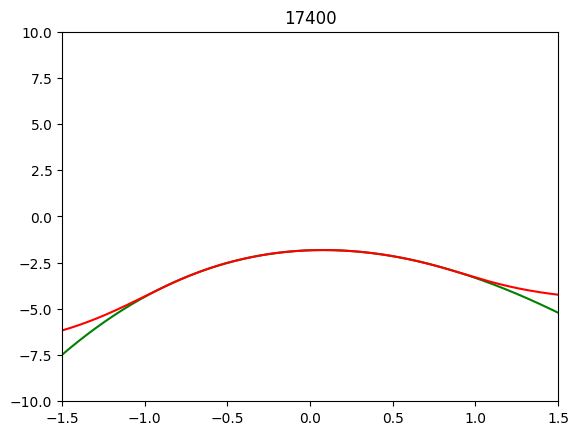

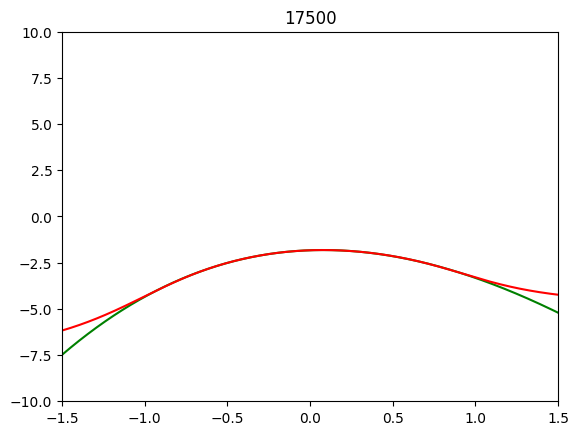

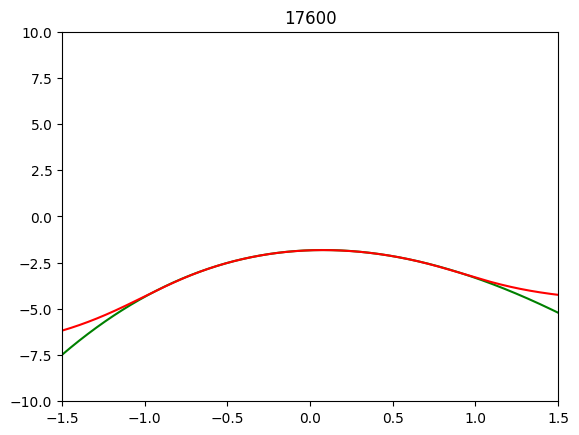

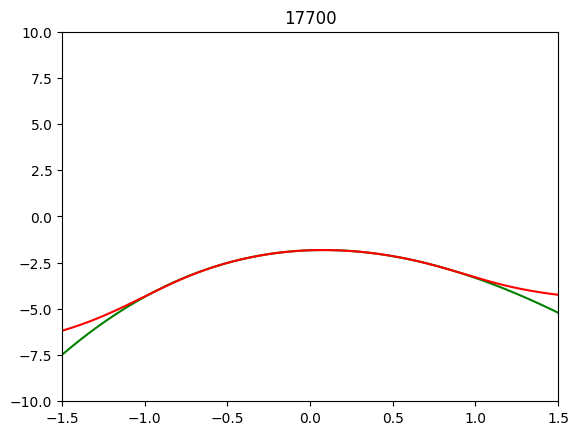

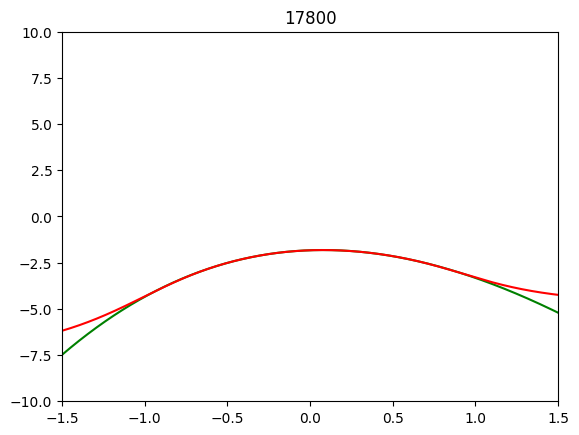

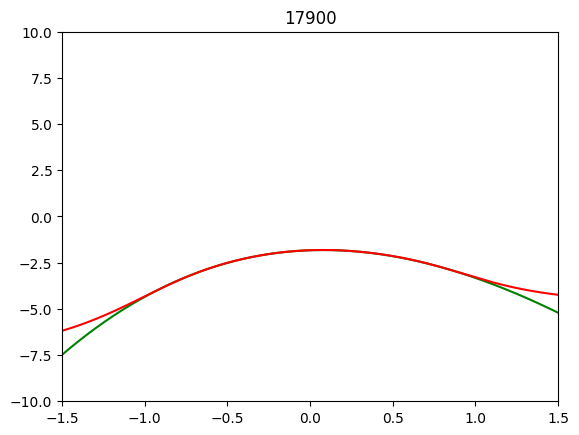

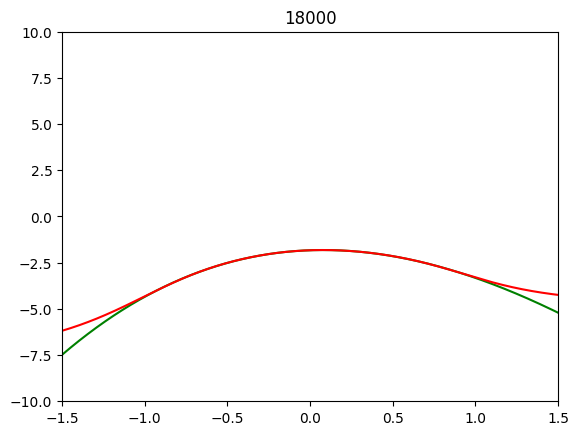

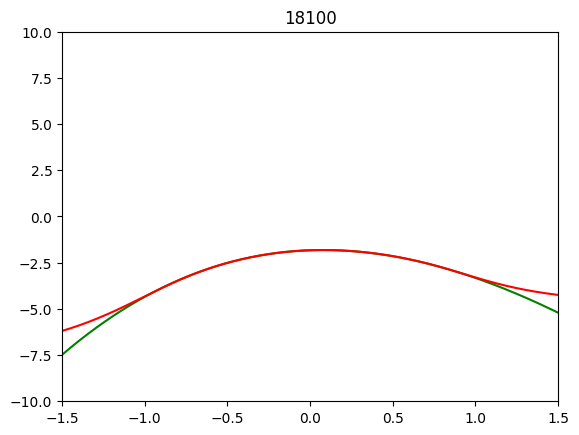

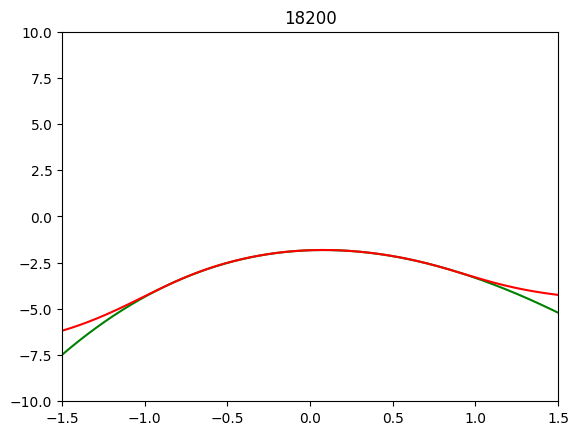

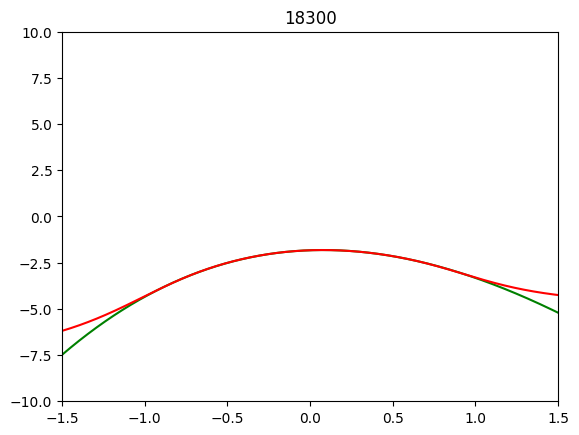

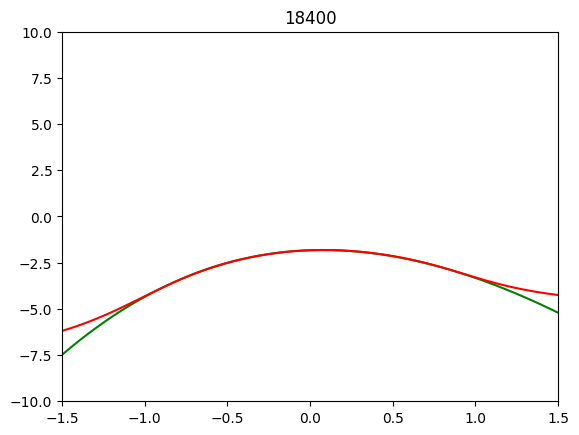

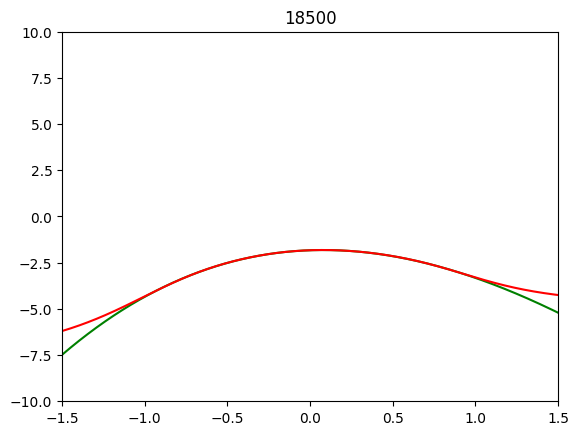

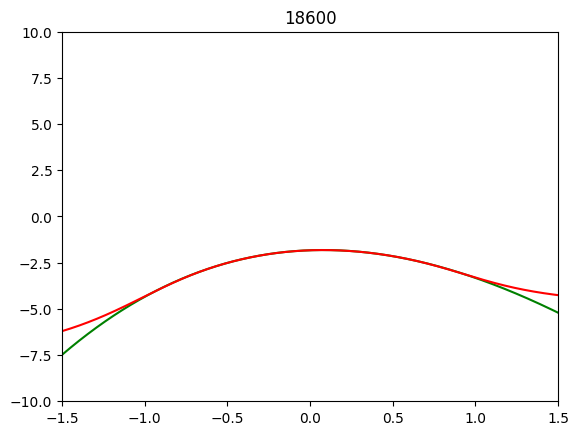

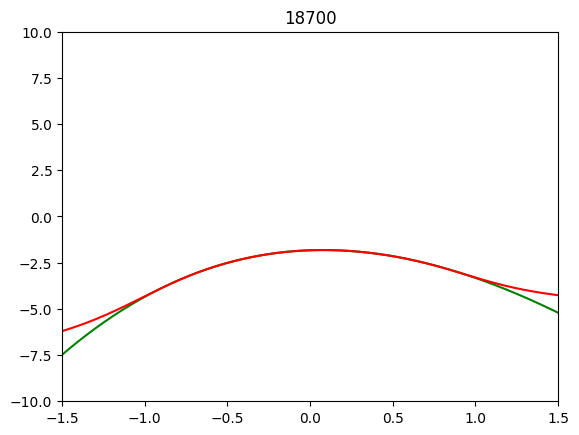

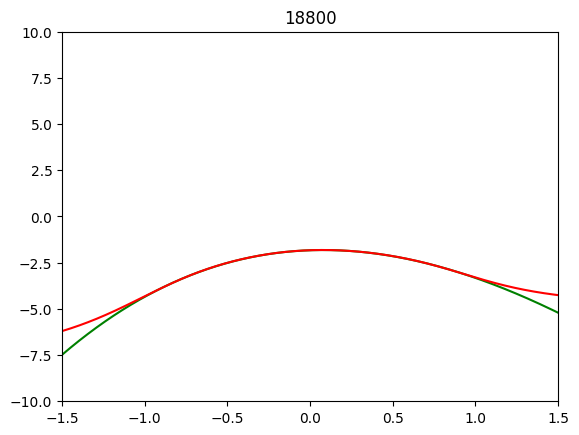

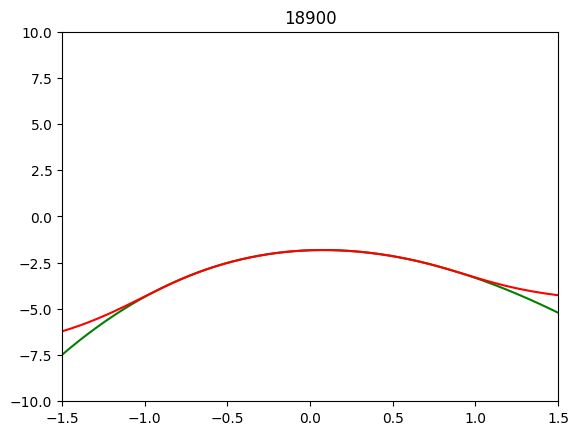

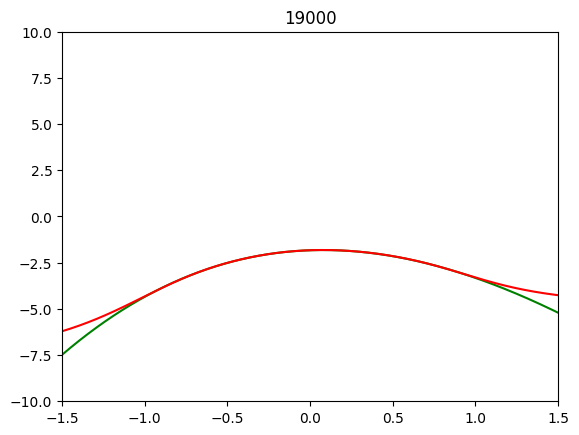

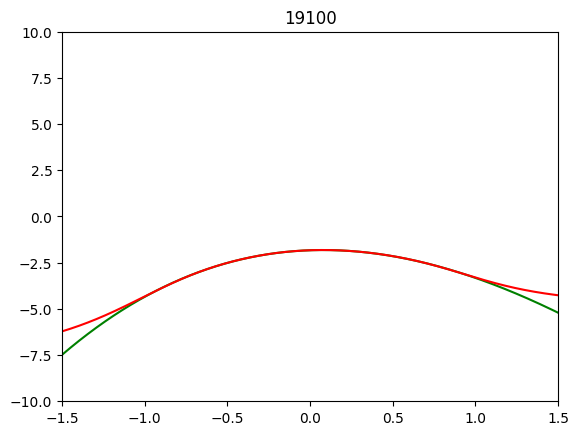

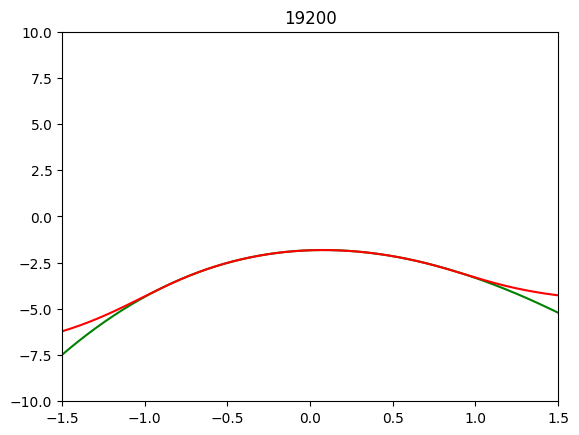

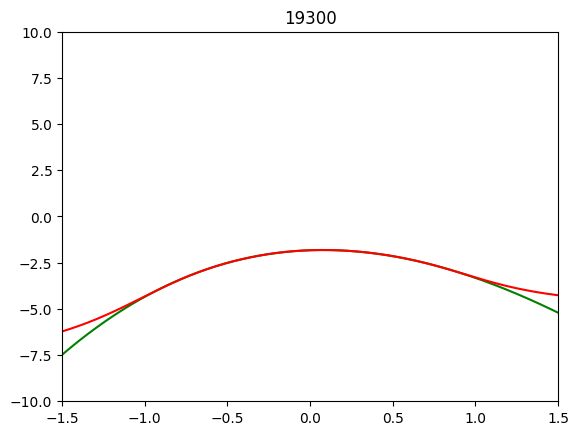

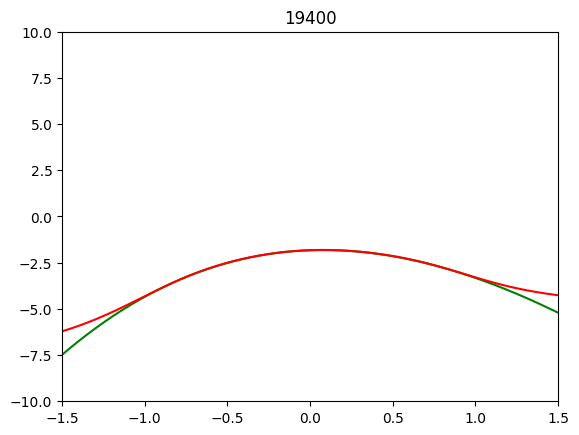

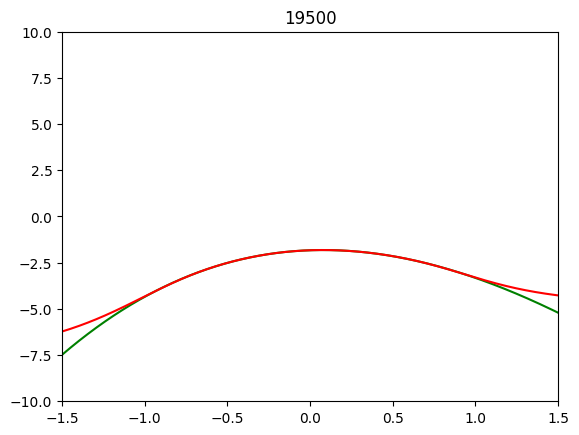

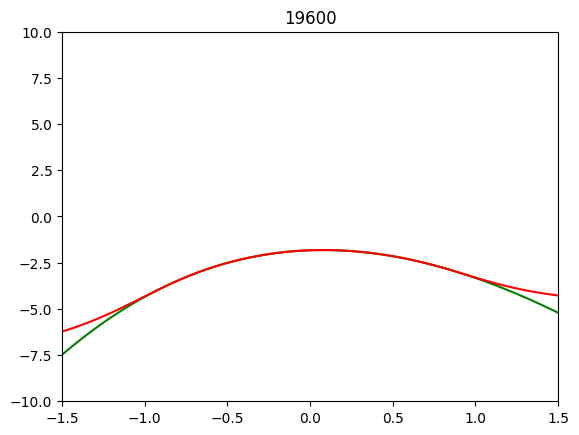

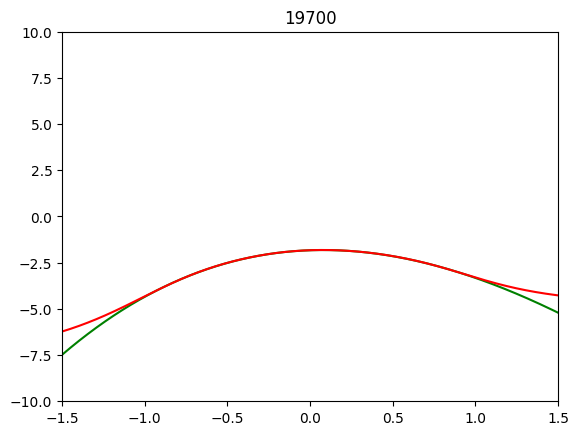

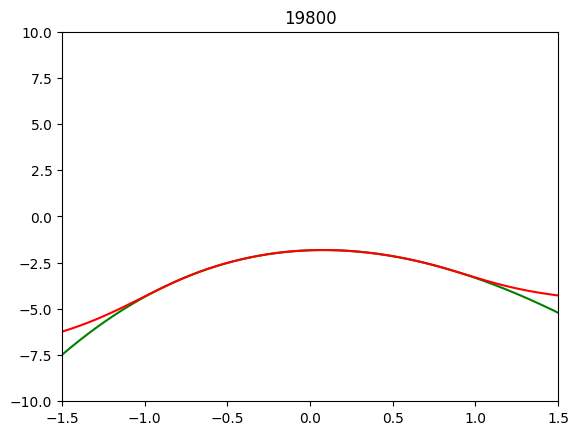

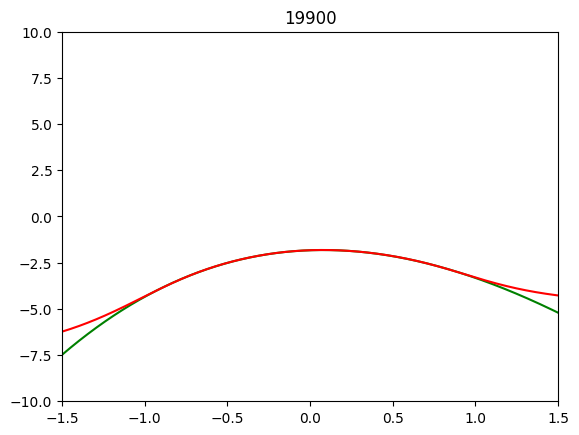

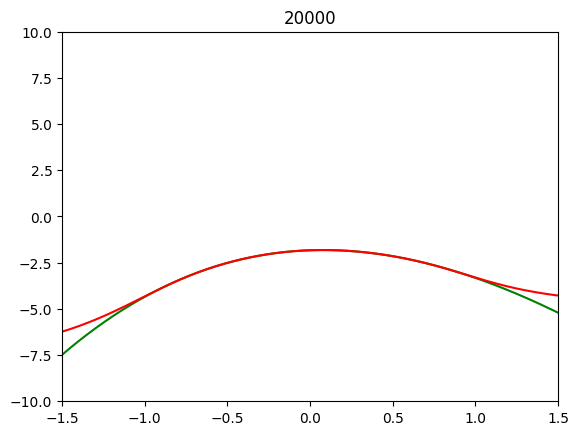

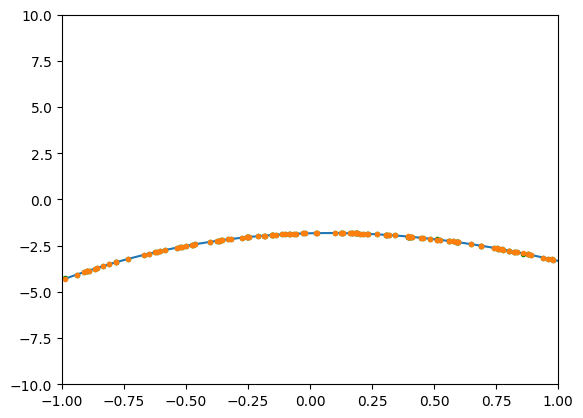

In [ ]:
main()